<a href="https://colab.research.google.com/github/PiyawatFrom/practices/blob/main/(not_complete)_House_Prices_Prediction_from_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price**

[House Prices - Advanced Regression Techniques (Kaggle)](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

[Pycarat Gitbook](https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation)

SalePrice is Target.

In [ ]:
!pip install pycaret
!pip install --upgrade pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Get Data form kaggle**

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 78.9MB/s]


In [ ]:
import zipfile

# Replace the file path with the path to your ZIP file in Google Drive
zip_file_path = '/content/house-prices-advanced-regression-techniques.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files from the ZIP file
    zip_ref.extractall('/content/')

In [ ]:
# Replace the file name with the name of your extracted CSV file
train_path = '/content/train.csv'
unseen_path = '/content/test.csv'

# Read the CSV file using pandas
HousePrices_train = pd.read_csv(train_path)
HousePrices_unseen = pd.read_csv(unseen_path)

# **EDA**

## **First look**

In [ ]:
HousePrices_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
HousePrices_train.shape

(1460, 81)

In [ ]:
HousePrices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
HousePrices_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [ ]:
#MSSubClass is catagory
#change to string col
HousePrices_train['MSSubClass'] = HousePrices_train['MSSubClass'].astype('str')
HousePrices_unseen['MSSubClass'] = HousePrices_train['MSSubClass'].astype('str')

<Axes: >

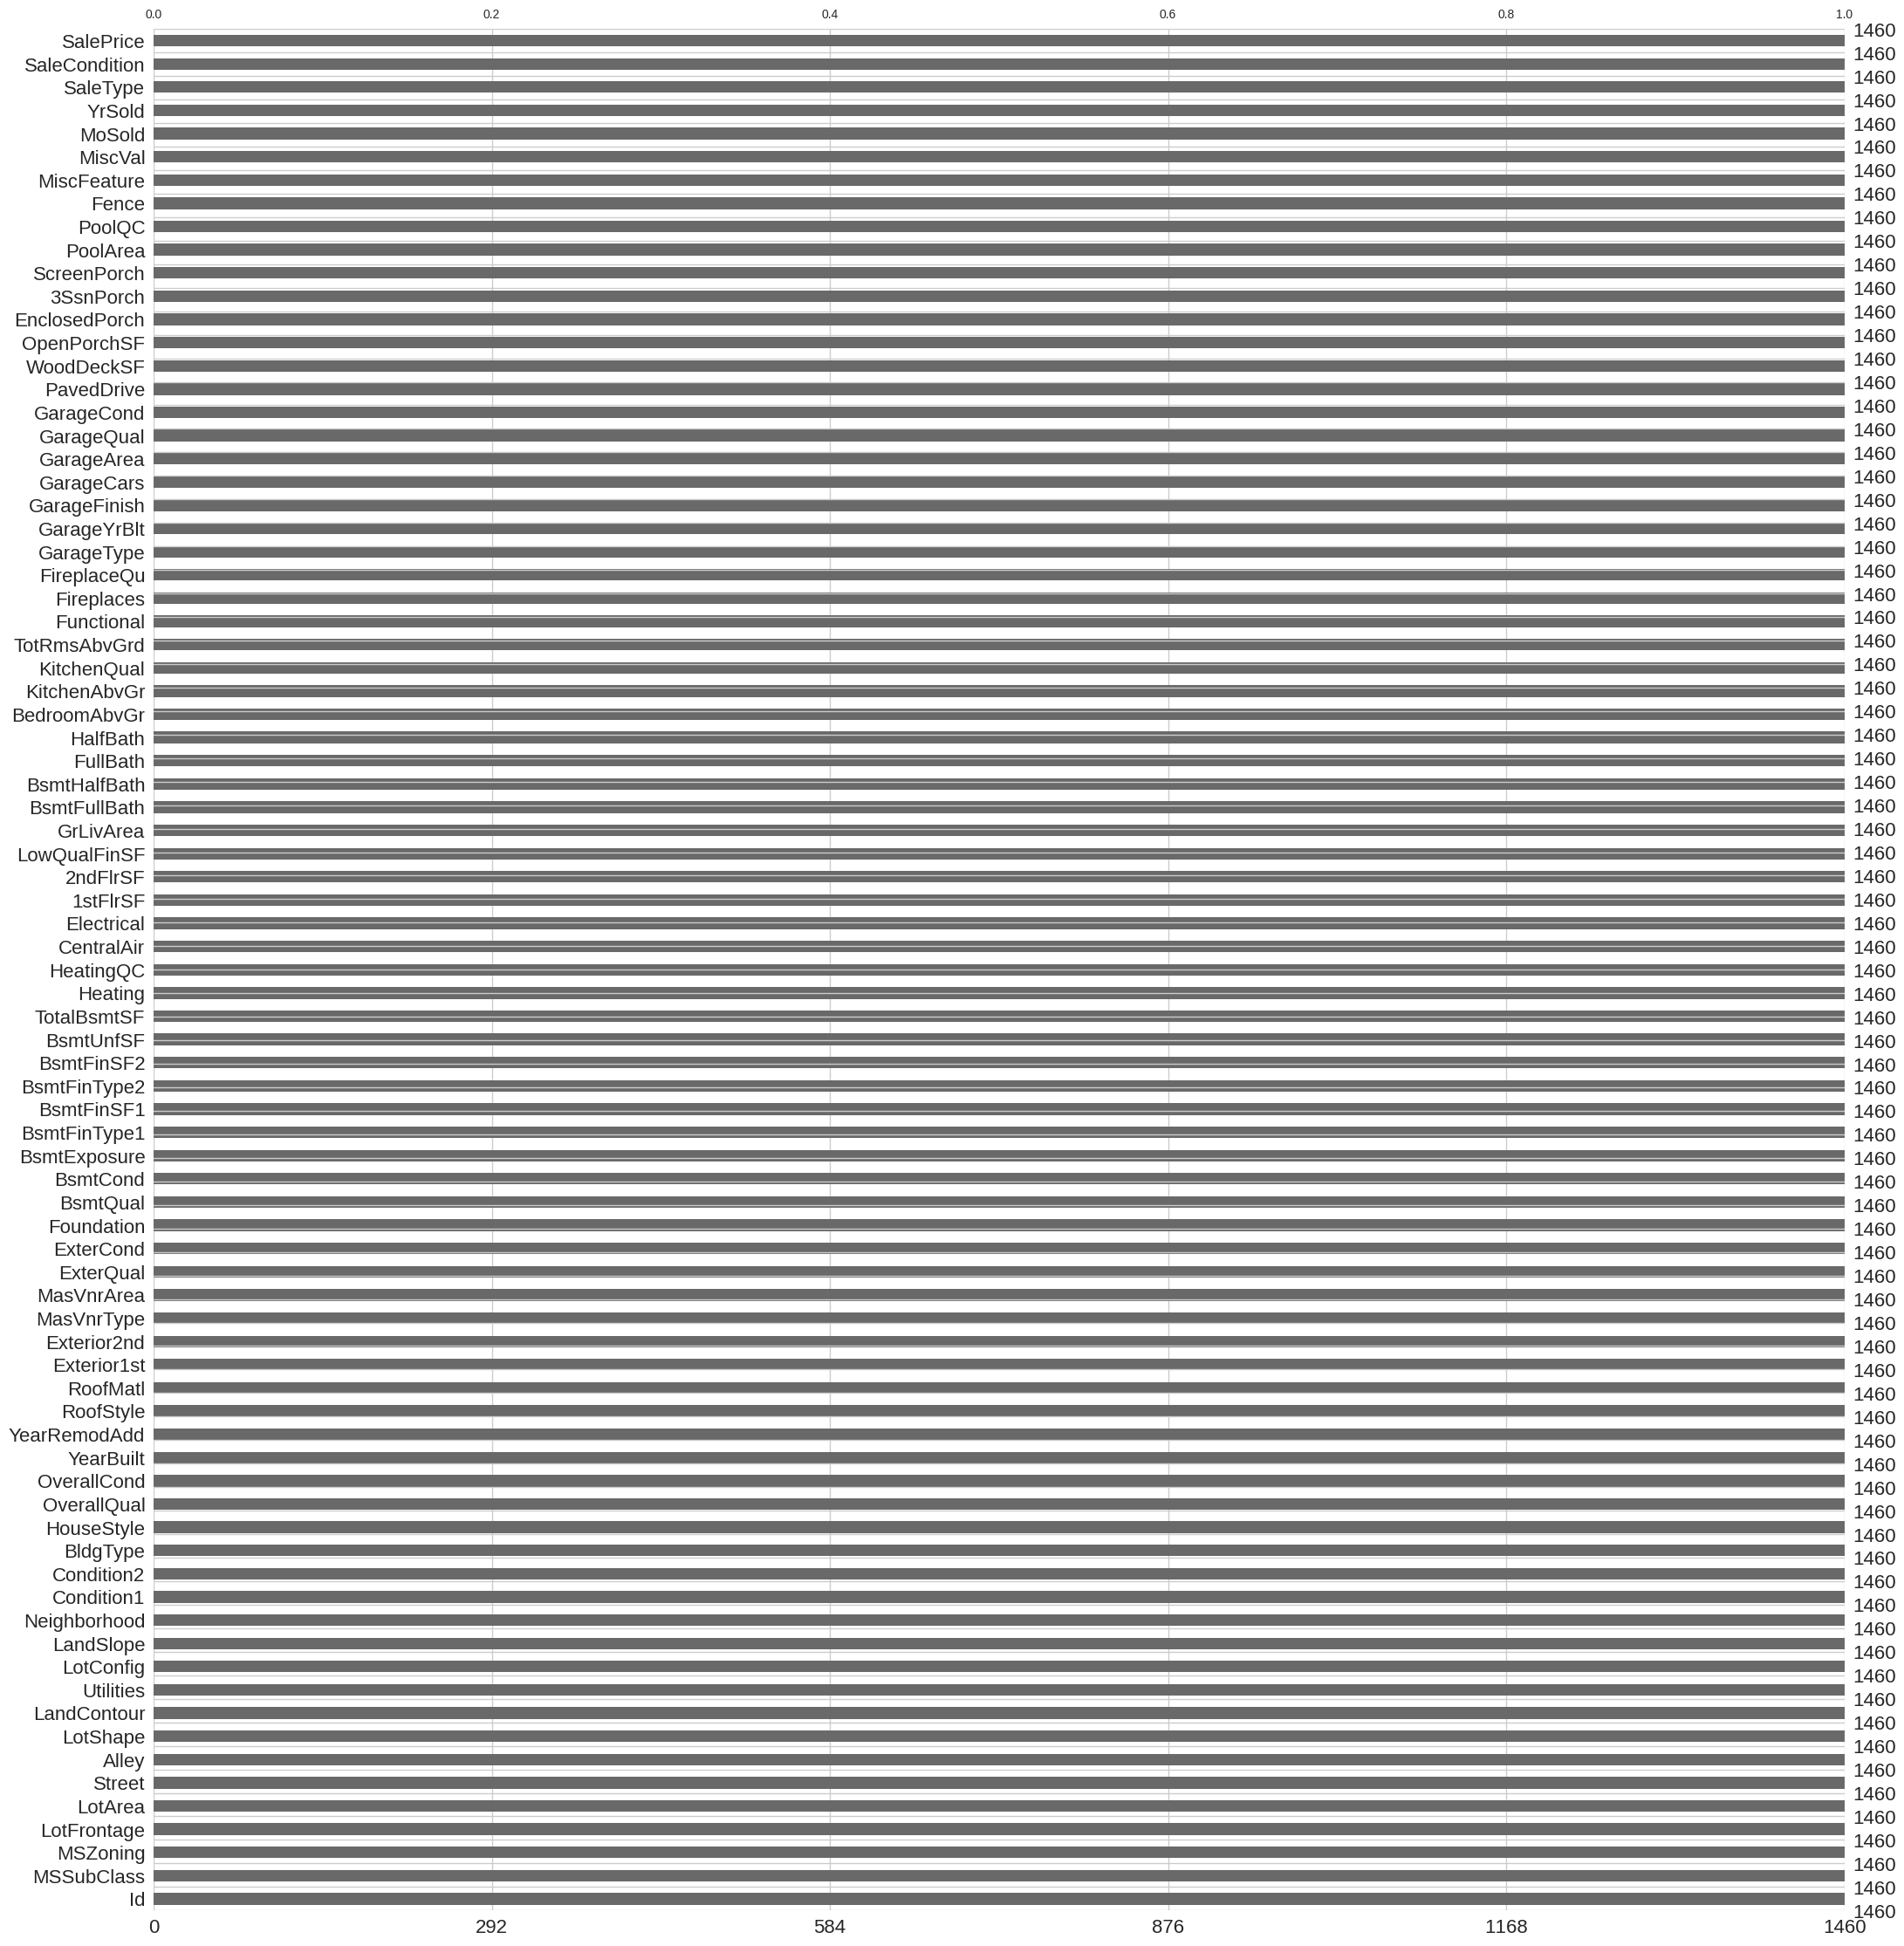

In [ ]:
import missingno as msno
msno.bar(HousePrices_train)

## **Eliminate missing values**

### **MiscFeature**

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	  None

In [ ]:
HousePrices_train['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
HousePrices_train['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

Null means none. Therefore, replace it with the word none.

In [ ]:
HousePrices_train['MiscFeature'].fillna('None', inplace=True)
HousePrices_train['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [ ]:
#List for use in future
fill_null_with_none = []
fill_null_with_none.append('MiscFeature')

### **Fence (รั้วบ้าน)**

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	 Good Wood
       MnWw	 Minimum Wood/Wire
       NA	   No Fence

In [ ]:
HousePrices_train['Fence'].unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
HousePrices_train['Fence'].fillna('None', inplace=True)
HousePrices_train['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

Note : this column is ordinary data

In [ ]:
fill_null_with_none.append('Fence')

### **PoolQC**

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [ ]:
HousePrices_train['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [ ]:
HousePrices_train['PoolQC'].fillna('None', inplace=True)
HousePrices_train['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

Note : this column is ordinary data

In [ ]:
fill_null_with_none.append('PoolQC')

### **GarageCond**

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
HousePrices_train['GarageCond'].unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

In [ ]:
HousePrices_train['GarageCond'].fillna('None', inplace=True)
HousePrices_train['GarageCond'].value_counts()

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

Note : this column is ordinary data

In [ ]:
fill_null_with_none.append('GarageCond')

### **GarageQual**

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
HousePrices_train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [ ]:
HousePrices_train['GarageQual'].fillna('None', inplace=True)
HousePrices_train['GarageQual'].value_counts()

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64

In [ ]:
fill_null_with_none.append('GarageQual')

Note : this column is ordinary data

In [ ]:
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **GarageFinish(ตกแต่งภายในโรงรถ)**

In [ ]:
HousePrices_train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'None'], dtype=object)

In [ ]:
HousePrices_train['GarageFinish'].fillna('None', inplace=True)
HousePrices_train['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [ ]:
fill_null_with_none.append('GarageFinish')

In [ ]:
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **GarageYrBlt (ปีที่สร้างโรงรถ)**

In [ ]:
HousePrices_train['GarageYrBlt'].describe()

count    1460.000000
mean     1979.976027
std        24.749688
min      1900.000000
25%      1962.000000
50%      1984.500000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [ ]:
HousePrices_train['GarageYrBlt'].mode()

0    2005.0
Name: GarageYrBlt, dtype: float64

In [ ]:
HousePrices_train['GarageYrBlt'].value_counts()[2005]

146

<Axes: >

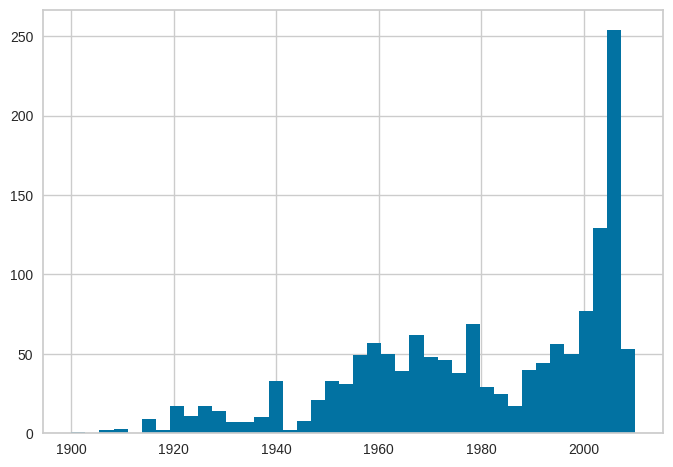

In [ ]:
HousePrices_train['GarageYrBlt'].hist(bins=40)

<Axes: ylabel='Density'>

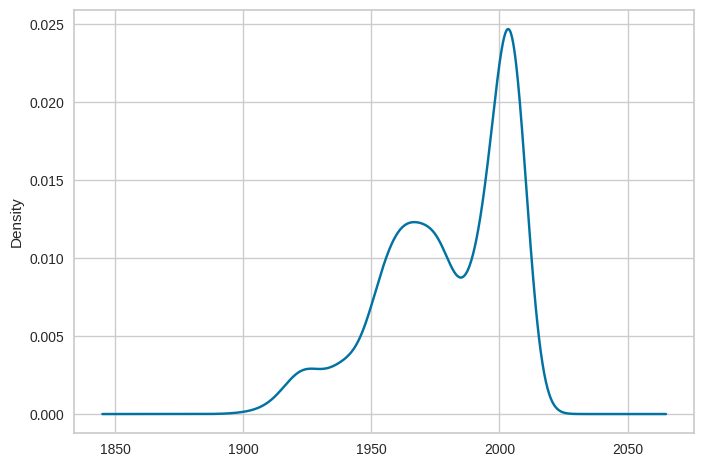

In [ ]:
HousePrices_train['GarageYrBlt'].plot.kde()

In [ ]:
HousePrices_train['GarageYrBlt'].fillna(HousePrices_train['GarageYrBlt'].mode()[0], inplace=True)
HousePrices_train['GarageYrBlt'].count()

1460

In [ ]:
imputation_with_mode = []

In [ ]:
imputation_with_mode.append('GarageFinish')

In [ ]:
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **GarageType**

In [ ]:
HousePrices_train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

In [ ]:
HousePrices_train['GarageType'].fillna('None', inplace=True)
HousePrices_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
fill_null_with_none.append('GarageType')

In [ ]:
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **FireplaceQu (คุณภาพเตาผิง)**

In [ ]:
damn_col = 'FireplaceQu'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

----------------------------------------


None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **Electrical**

In [ ]:
HousePrices_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [ ]:
HousePrices_train['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
HousePrices_train['Electrical'].fillna(HousePrices_train['Electrical'].mode()[0], inplace=True)
HousePrices_train['Electrical'].count()

1460

In [ ]:
HousePrices_train['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
imputation_with_mode.append('Electrical')

In [ ]:
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **BsmtFinType2**

In [ ]:
damn_col = 'BsmtFinType2'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

----------------------------------------


Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **BsmtFinType1**

In [ ]:
damn_col = 'BsmtFinType1'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], dtype=object)

----------------------------------------


Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **BsmtExposure**

In [ ]:
damn_col = 'BsmtExposure'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)

----------------------------------------


No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **BsmtCond**

In [ ]:
damn_col = 'BsmtCond'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

----------------------------------------


TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **BsmtQual**

In [ ]:
damn_col = 'BsmtQual'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)

----------------------------------------


TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **MasVnrArea (พื้นที่ไม้วีเนียร์)**

MasVnrArea: Masonry veneer area in square feet (พื้นที่ไม้วีเนียร์ก่ออิฐเป็นตารางฟุต)

In [ ]:
HousePrices_train['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
HousePrices_train['MasVnrArea'].mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [ ]:
HousePrices_train['MasVnrArea'].value_counts()[0]

869

<Axes: >

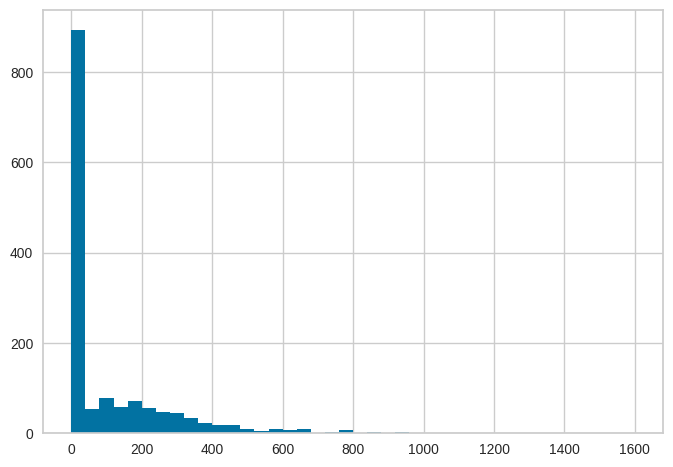

In [ ]:
HousePrices_train['MasVnrArea'].hist(bins=40)

<Axes: ylabel='Density'>

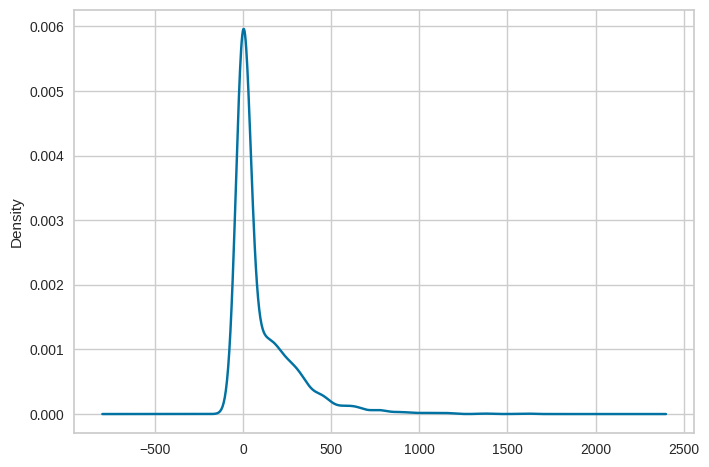

In [ ]:
HousePrices_train['MasVnrArea'].plot.kde()

In [ ]:
HousePrices_train['MasVnrArea'].fillna(HousePrices_train['MasVnrArea'].mode()[0], inplace=True)
HousePrices_train['MasVnrArea'].count()

1460

In [ ]:
imputation_with_mode.append('MasVnrArea')

In [ ]:
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **MasVnrType**

In [ ]:
damn_col = 'MasVnrType'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

----------------------------------------


None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **Alley**

In [ ]:
damn_col = 'Alley'
display(HousePrices_train[damn_col].unique())
print('-'*40)
HousePrices_train[damn_col].fillna('None', inplace=True)
display(HousePrices_train[damn_col].value_counts())

array(['None', 'Grvl', 'Pave'], dtype=object)

----------------------------------------


None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [ ]:
fill_null_with_none.append(damn_col)
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **LotFrontage (ระยะจากถนน)**

LotFrontage: Linear feet of street connected to property (ระยะห่างเส้นตรงจากถนน)

In [ ]:
HousePrices_train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
HousePrices_train['LotFrontage'].mode()

0    69.0
Name: LotFrontage, dtype: float64

In [ ]:
HousePrices_train['LotFrontage'].value_counts()[60]

143

<Axes: >

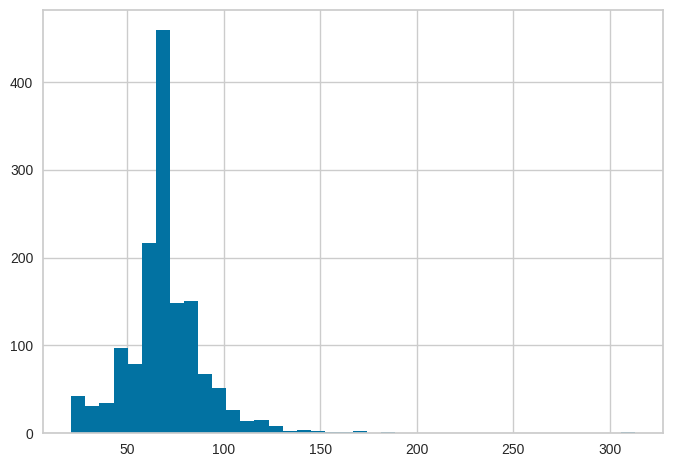

In [ ]:
HousePrices_train['LotFrontage'].hist(bins=40)

<Axes: ylabel='Density'>

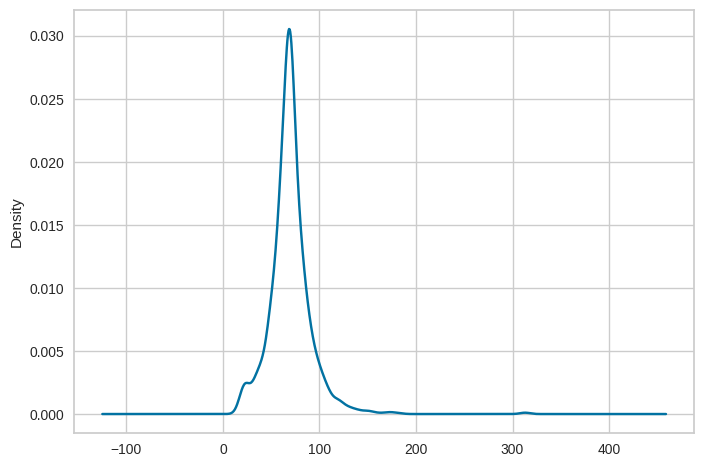

In [ ]:
HousePrices_train['LotFrontage'].plot.kde()

mode < median < mean :
Right Skewed Distribution


In [ ]:
HousePrices_train['LotFrontage'].median()

69.0

In [ ]:
HousePrices_train['LotFrontage'].fillna(HousePrices_train['LotFrontage'].median(), inplace=True)
HousePrices_train['LotFrontage'].count()

1460

In [ ]:
imputation_with_med = []

In [ ]:
imputation_with_med.append('LotFrontage')

In [ ]:
# Sum missing values in each column
missing_values_sum = HousePrices_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

Series([], dtype: int64)

### **Filled data method summary**

In [ ]:
fill_null_with_none.reverse()
imputation_with_mode.reverse()

In [ ]:
print('fill_null_with_none :' , fill_null_with_none)
print('imputation_with_mode :' , imputation_with_mode , ', mode =' , [HousePrices_train[item].mode()[0] for item in imputation_with_mode])
print('imputation_with_med :' , imputation_with_med,', median =', HousePrices_train['LotFrontage'].median())

fill_null_with_none : ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
imputation_with_mode : ['MasVnrArea', 'Electrical', 'GarageFinish'] , mode = [0.0, 'SBrkr', 'Unf']
imputation_with_med : ['LotFrontage'] , median = 69.0


In [ ]:
fill_method = ['fill_null_with_none','imputation_with_mode','imputation_with_med']

## **List of columns types**

In [ ]:
#Number Columns
num_col = list(HousePrices_train.select_dtypes(include="number").columns) #เอามาแต่ coloumn ที่เป็นตัวเลขใส่ลง list
num_col.remove("SalePrice") #ลบ Target (SalePrice) ออกจาก list
num_col.remove('Id') # Id ไม่ใช้
HousePrices_train[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [ ]:
#Category Columns
cat_col = list(HousePrices_train.select_dtypes(include="O").columns) #เอามาแต่ column ที่เป็นตัวอักษร ใส่ลง List
HousePrices_train[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  MasVnrType     1460 non-null

In [ ]:
print('full columns =', HousePrices_train.shape[1])
print('num col =' , len(num_col))
print('cat col =' , len(cat_col))
print('num + cat =' , len(num_col)+len(cat_col))

full columns = 81
num col = 35
cat col = 44
num + cat = 79


In [ ]:
ordinal_col_info = {'ExterQual':['Po','Fa','TA','Gd','Ex'] ,
                    'ExterCond':['Po','Fa','TA','Gd','Ex'],
                    'BsmtQual':['None','Po','Fa','TA','Gd','Ex'],
                    'BsmtCond':['None','Po','Fa','TA','Gd','Ex'],
                    'BsmtExposure':['None','No','Mn','Av','Gd'],
                    'BsmtFinType1':['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                    'BsmtFinType2':['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                    'HeatingQC':['Po','Fa','TA','Gd','Ex'],
                    'Electrical':['Mix','FuseP','FuseF','FuseA','SBrkr'],
                    'KitchenQual':['Po','Fa','TA','Gd','Ex'],
                    'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
                    'FireplaceQu':['None','Po','Fa','TA','Gd','Ex'],
                    'GarageFinish':['None','Unf','RFn','Fin'],
                    'GarageQual':['None','Po','Fa','TA','Gd','Ex'],
                    'GarageCond':['None','Po','Fa','TA','Gd','Ex'],
                    'PavedDrive':['N','P','Y'],
                    'PoolQC':['None','Fa','TA','Gd','Ex'],
                    'Fence':['None','MnWw','GdWo','MnPrv','GdPrv']}

In [ ]:
ordinal_col = list(ordinal_col_info.keys())

In [ ]:
ordinal_col

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence']

In [ ]:
# Remove members of B from A using a list comprehension
cat_col = [x for x in cat_col if x not in ordinal_col]

# Alternatively, you can use the remove() method
# for item in ordinal_col:
#     if item in cat_col:
#         cat_col.remove(item)

In [ ]:
#cat_col = list(set(cat_col)-set(ordinal_col))

In [ ]:
print(cat_col)
print(ordinal_col)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']


In [ ]:
print('full columns =', HousePrices_train.shape[1])
print('num col =' , len(num_col))
print('cat col =' , len(cat_col))
print('ordinal col =', len(ordinal_col))
print('num + cat =' , len(num_col)+len(cat_col)+len(ordinal_col))

full columns = 81
num col = 35
cat col = 26
ordinal col = 18
num + cat = 79


## **Analyze the Number columns**

In [ ]:
num_col_addTarget = list(HousePrices_train.select_dtypes(include="number").columns) #เอามาแต่ coloumn ที่เป็นตัวเลขใส่ลง list
num_col_addTarget.remove('Id') # Id ไม่ใช้

In [ ]:
HousePrices_train[num_col_addTarget].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


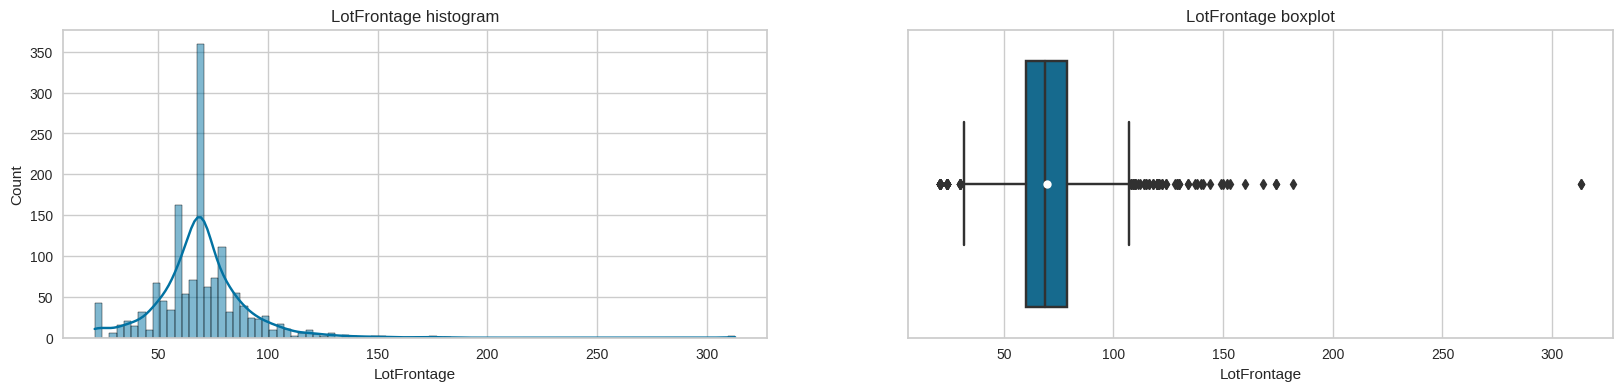

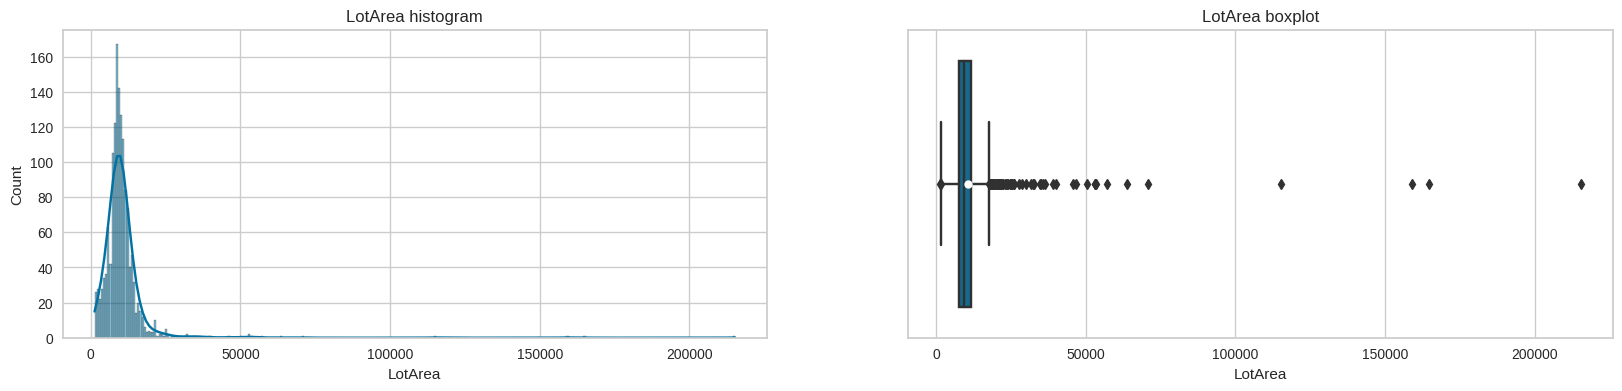

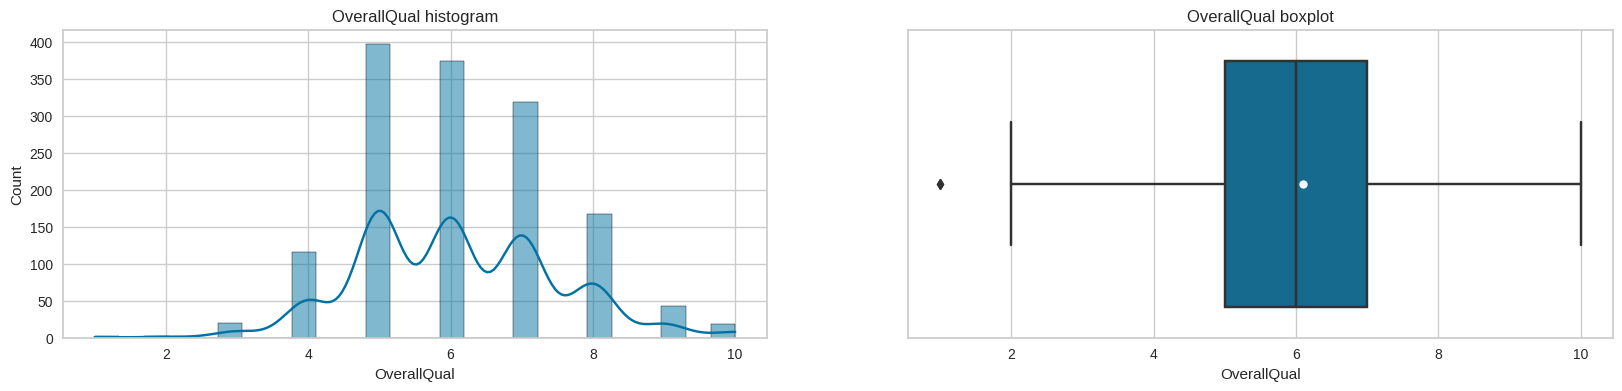

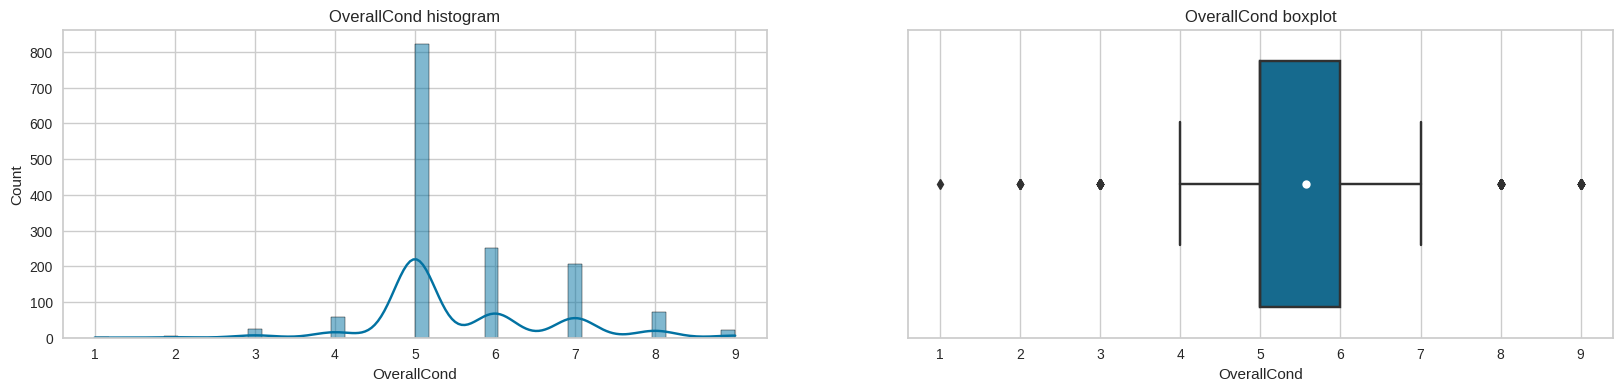

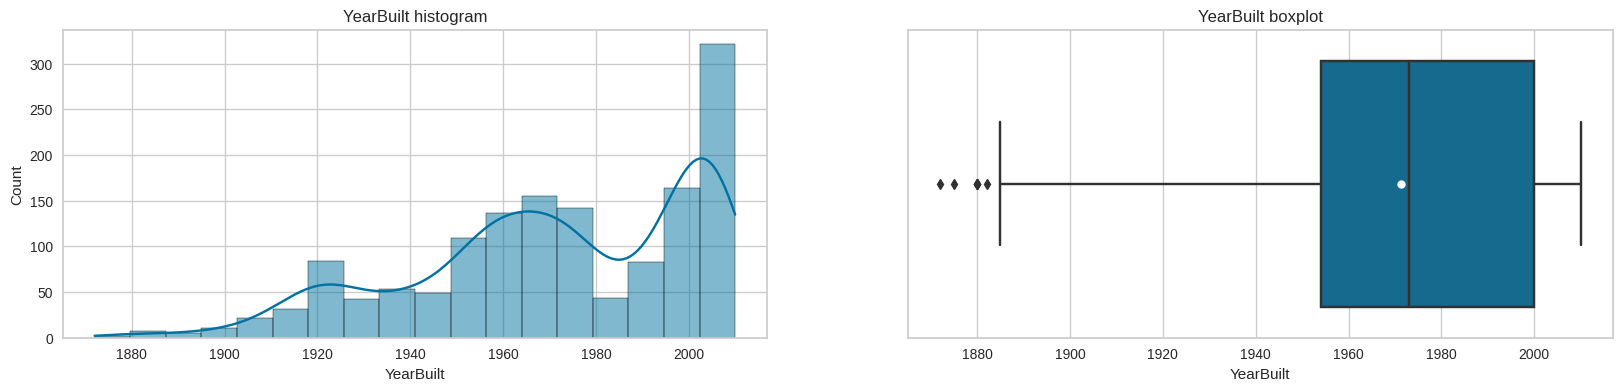

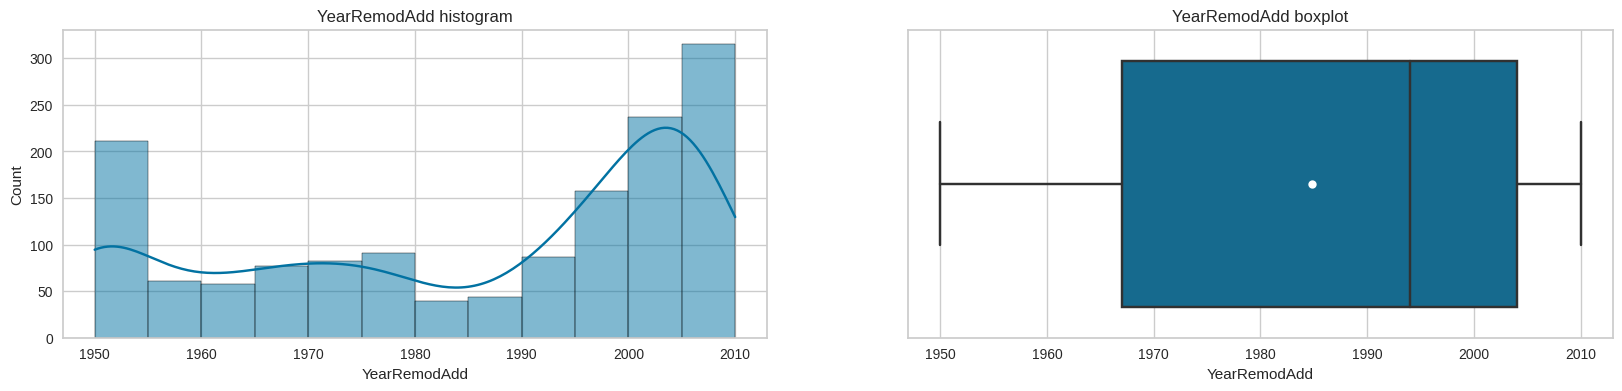

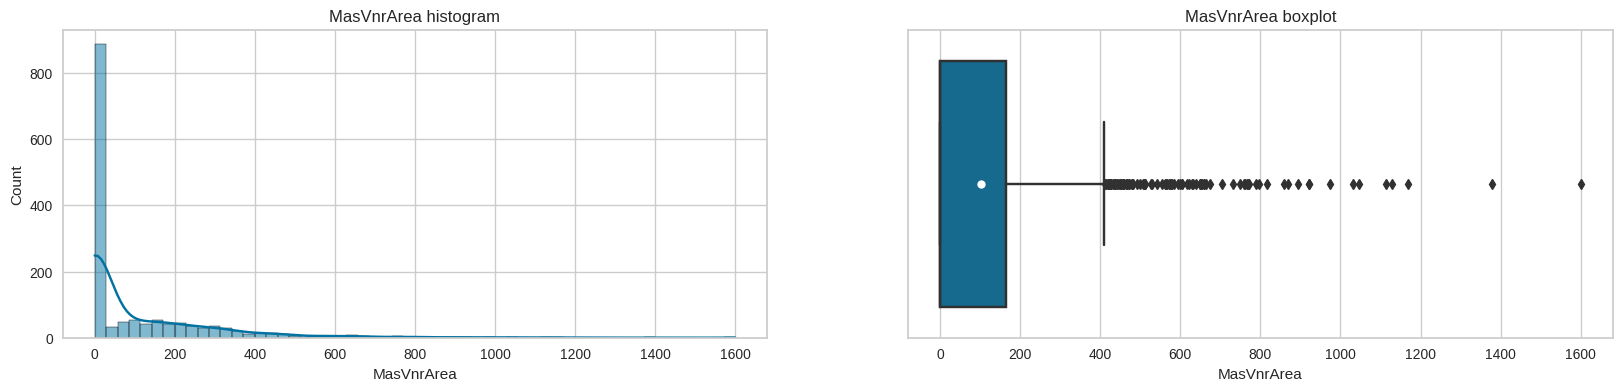

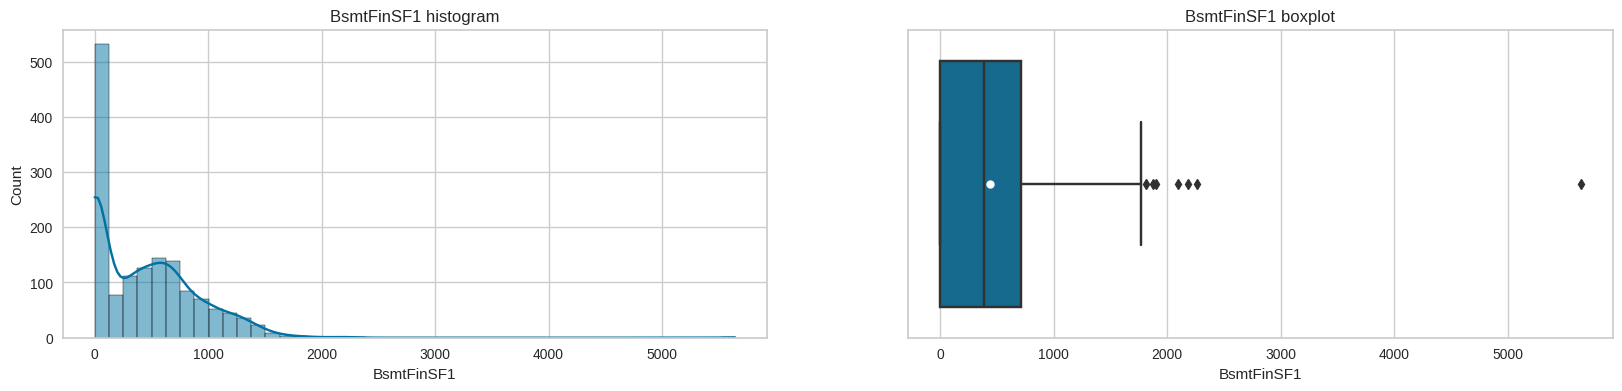

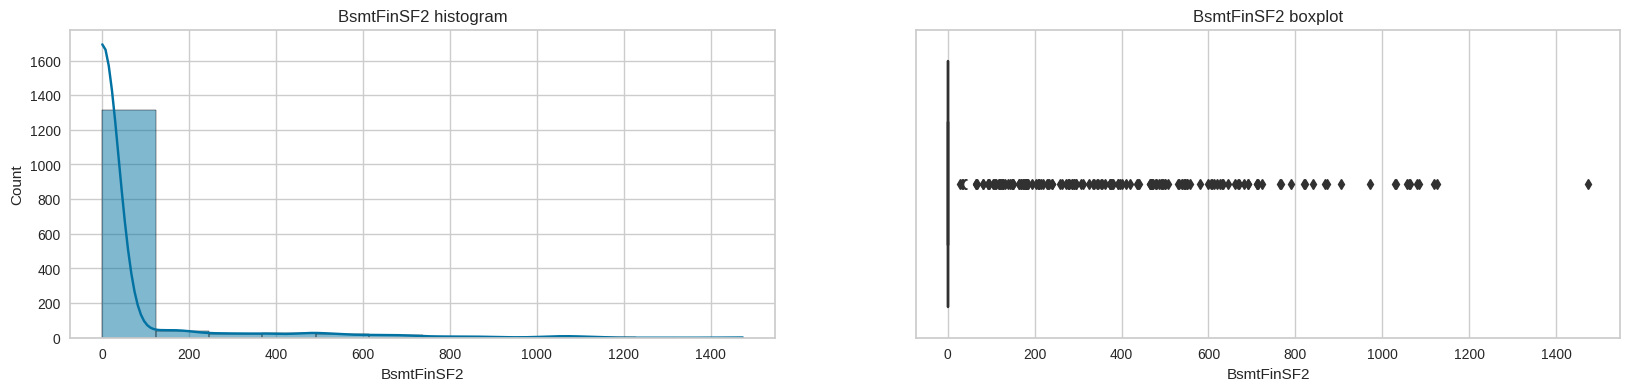

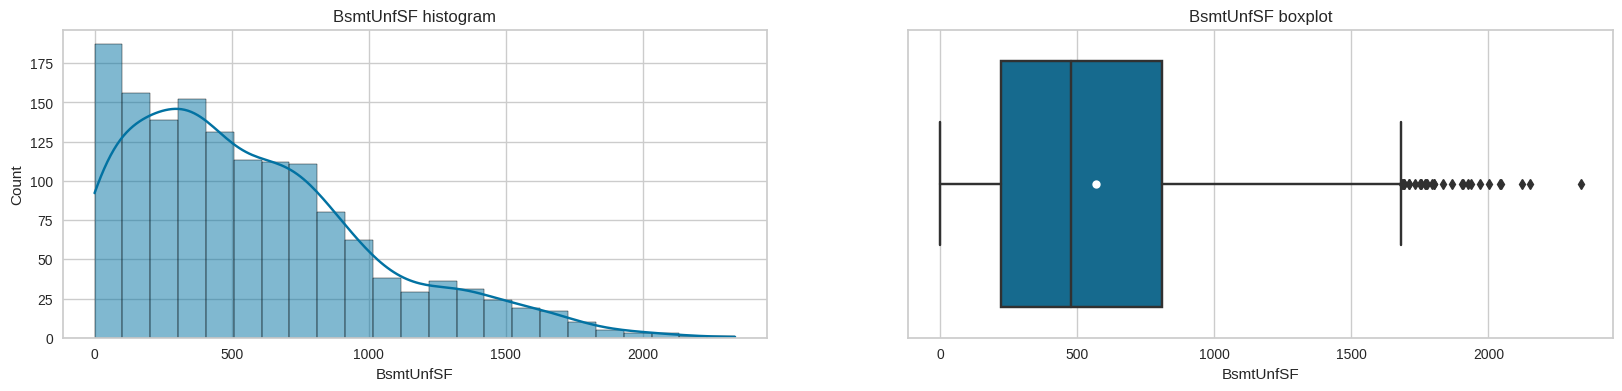

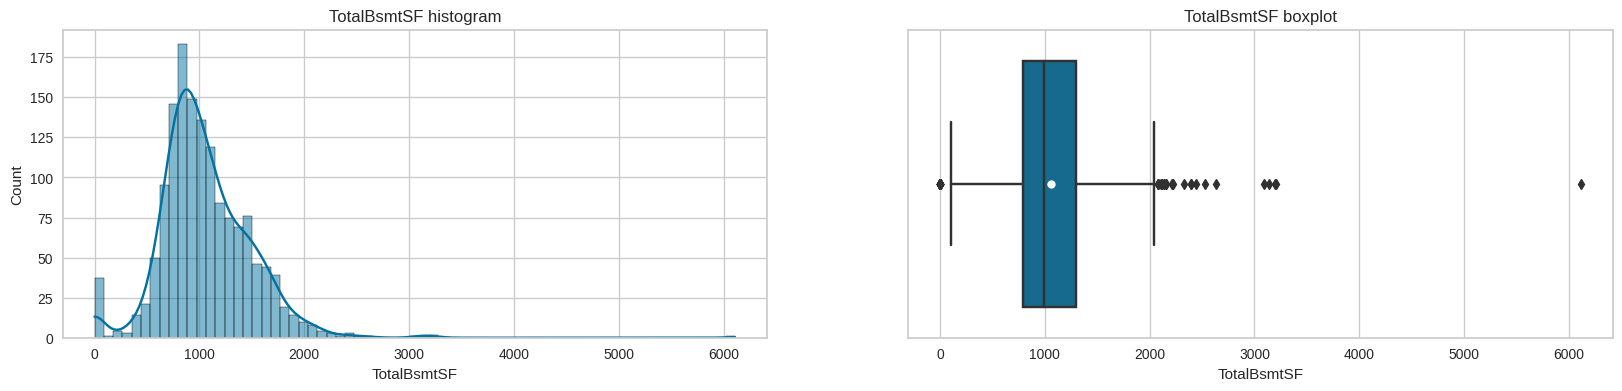

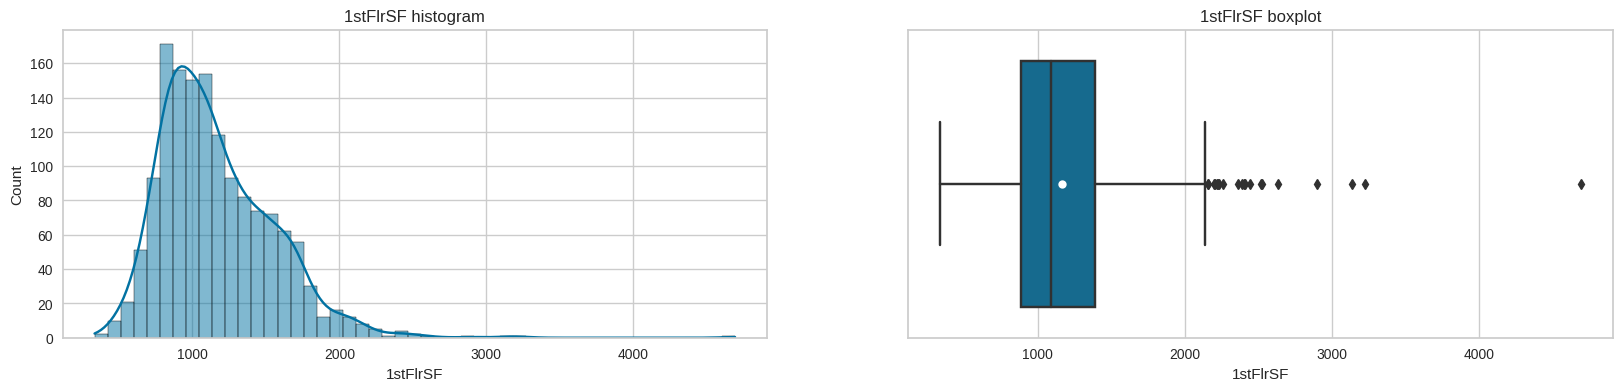

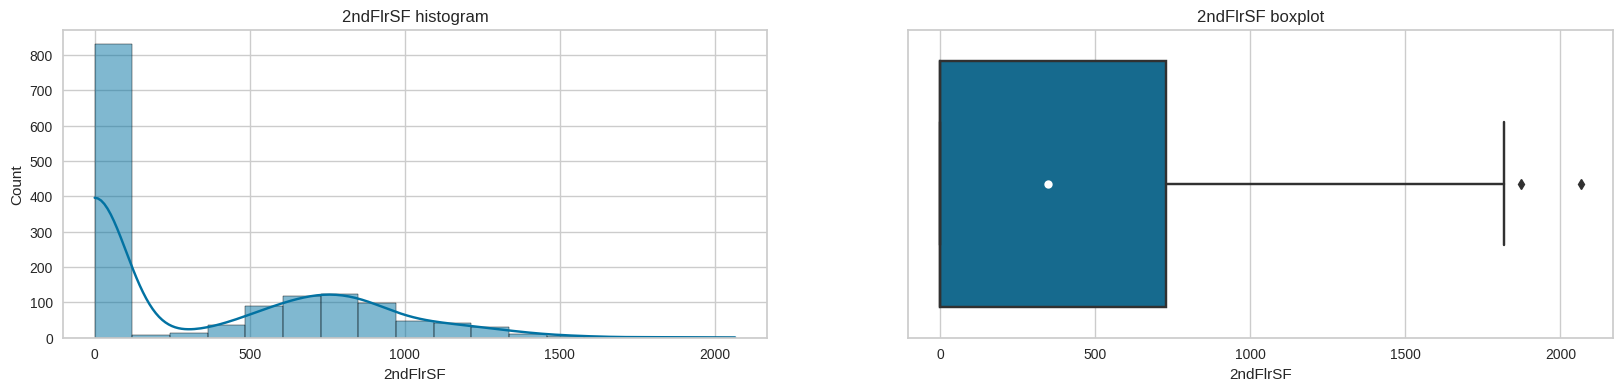

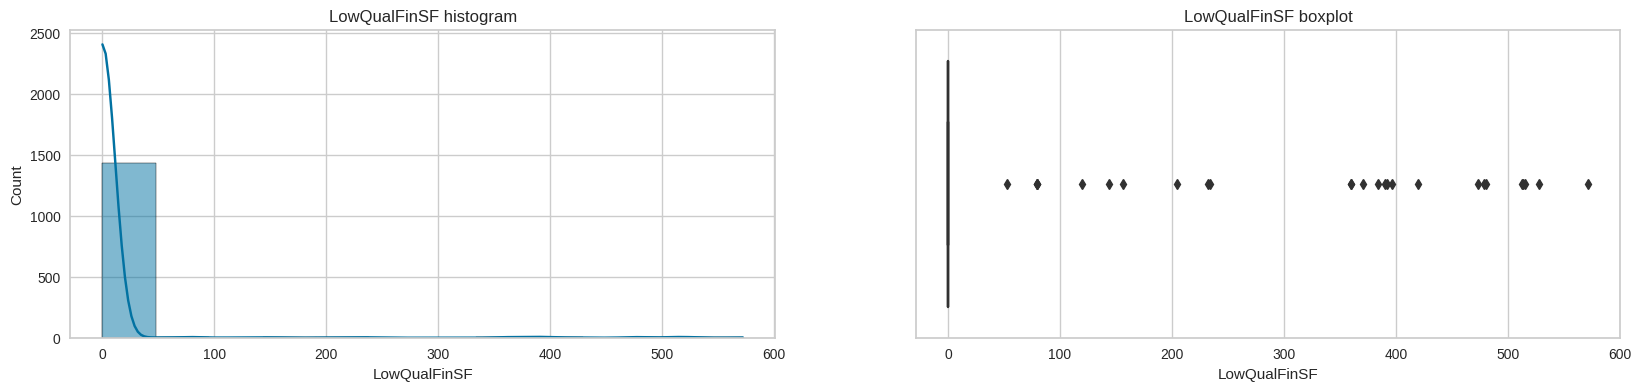

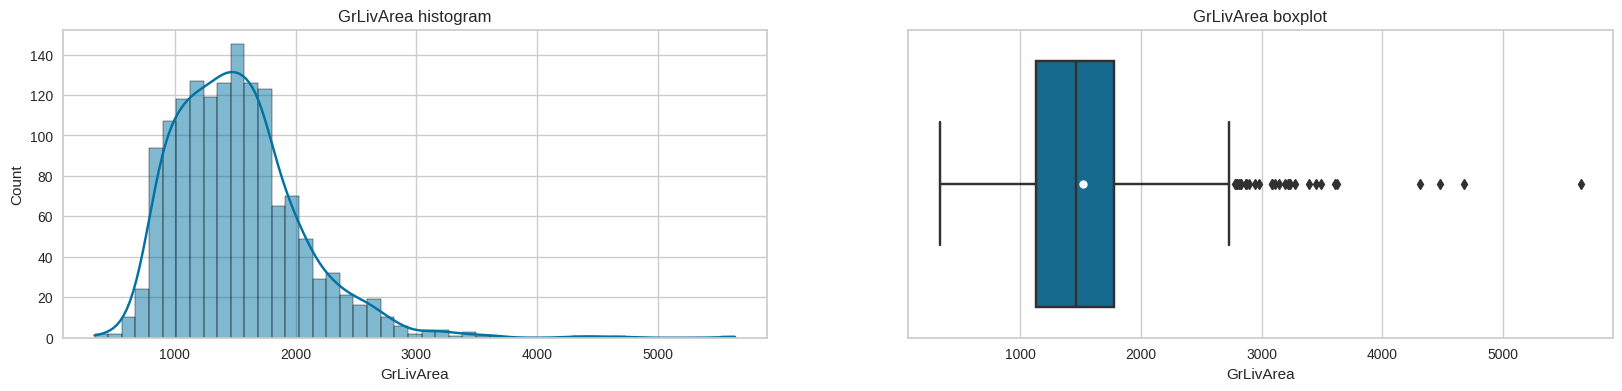

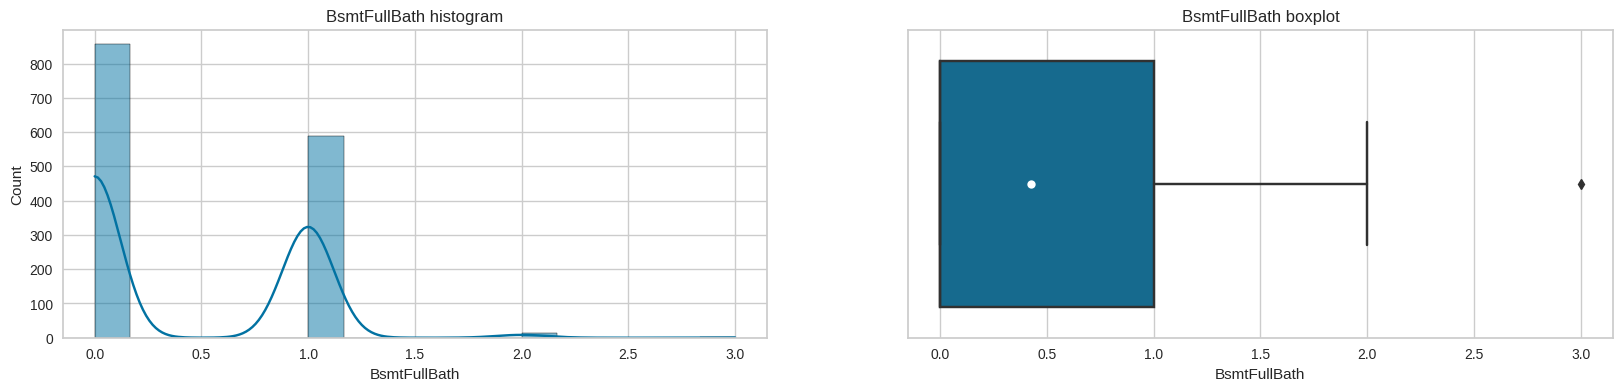

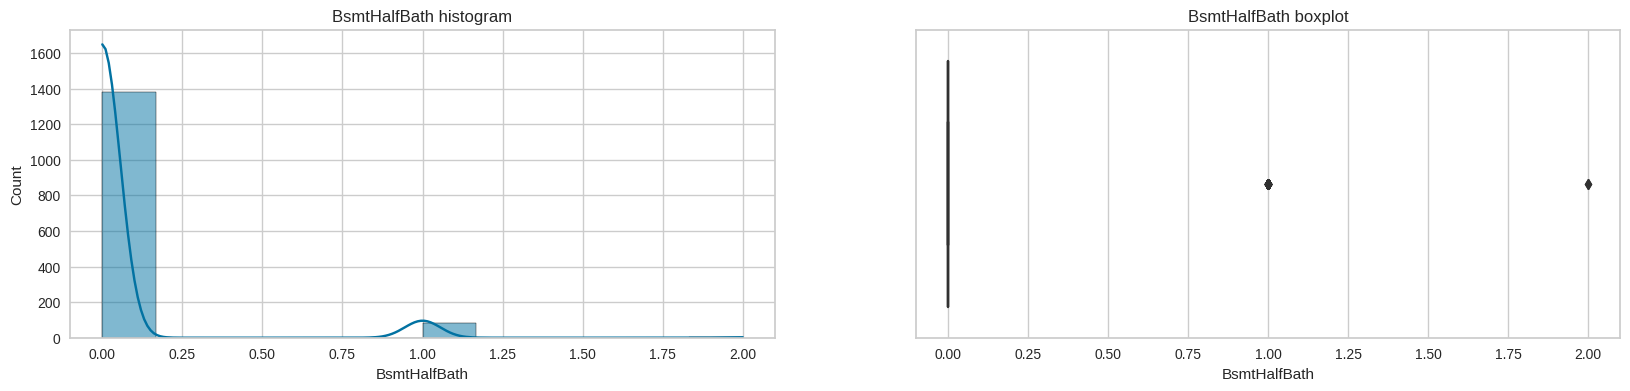

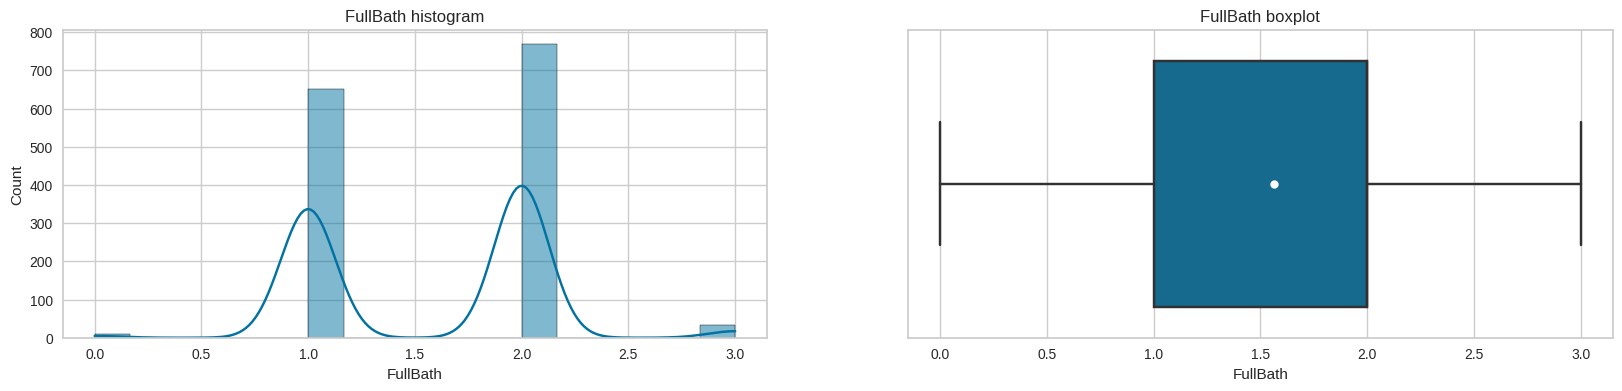

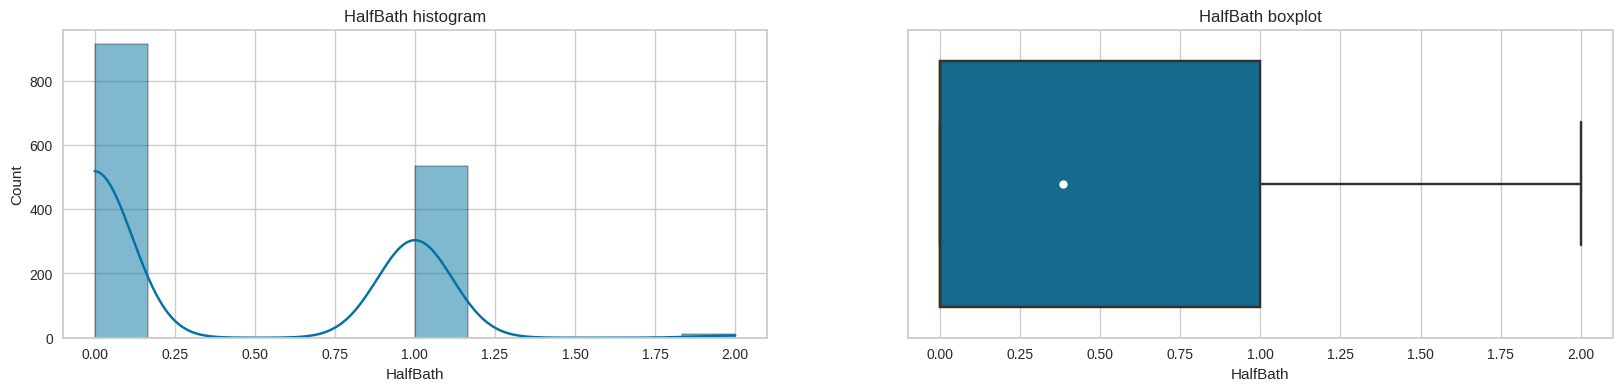

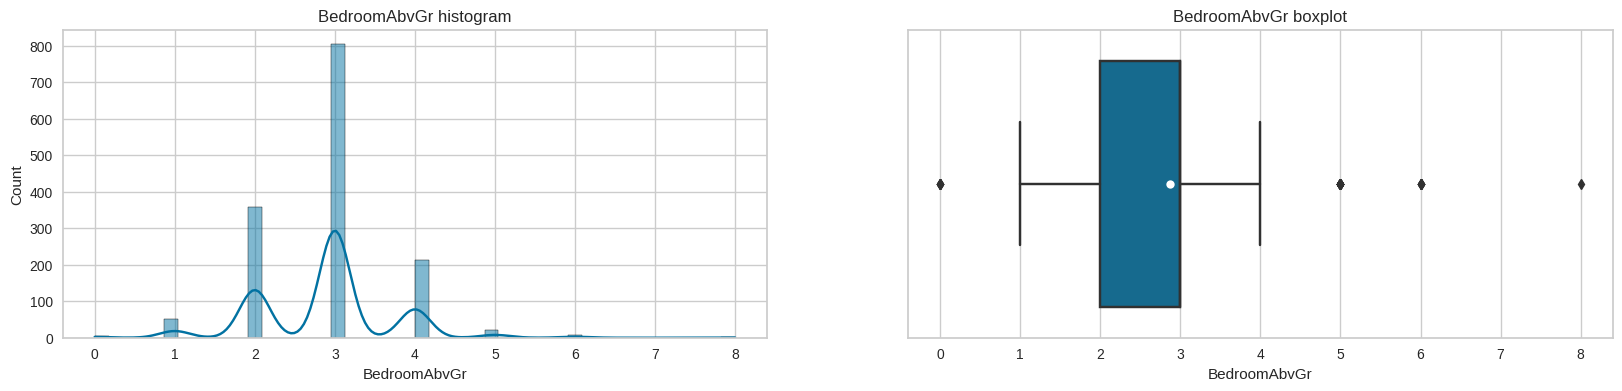

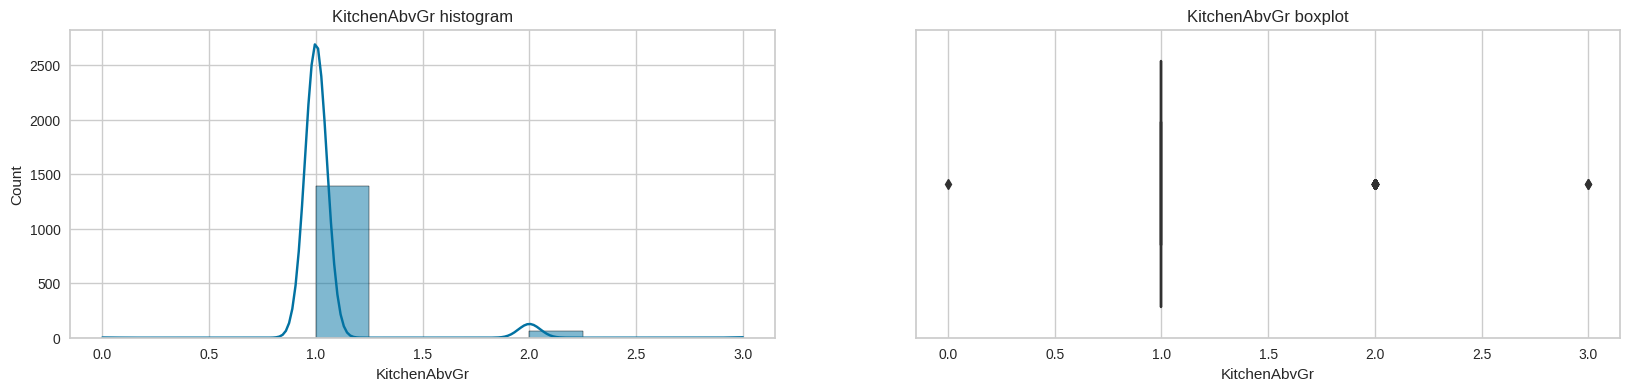

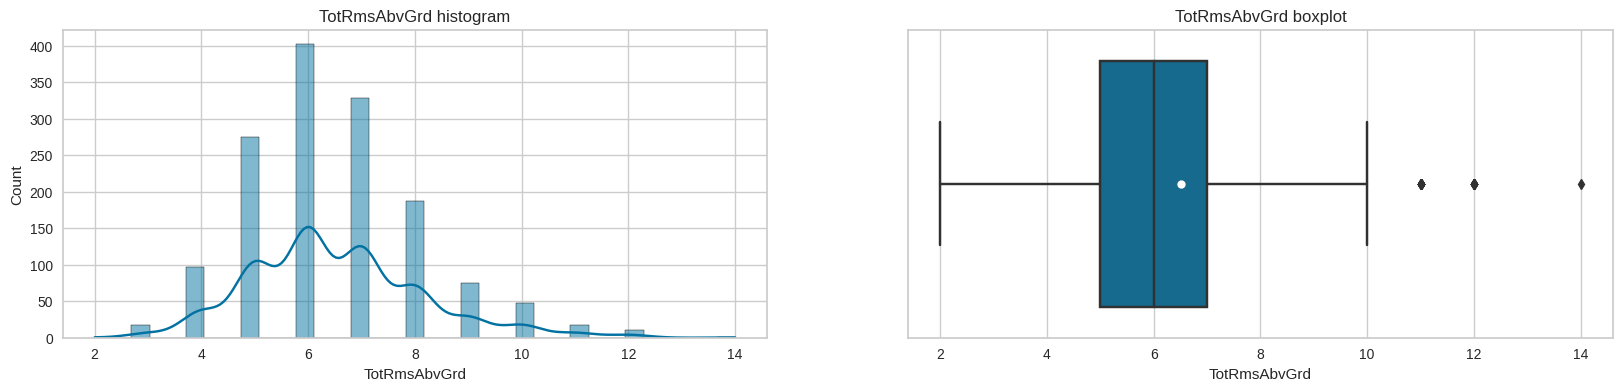

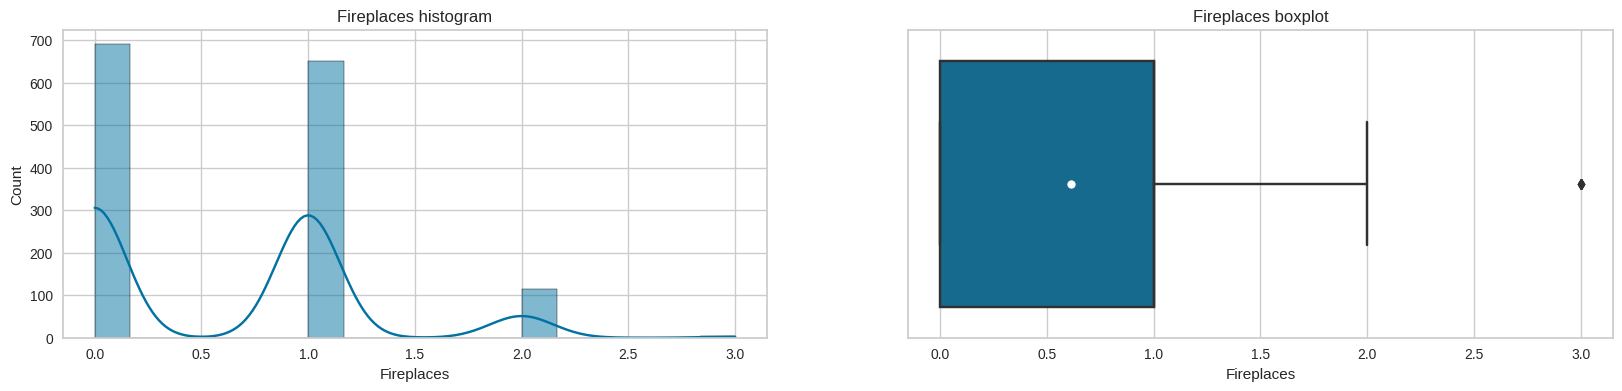

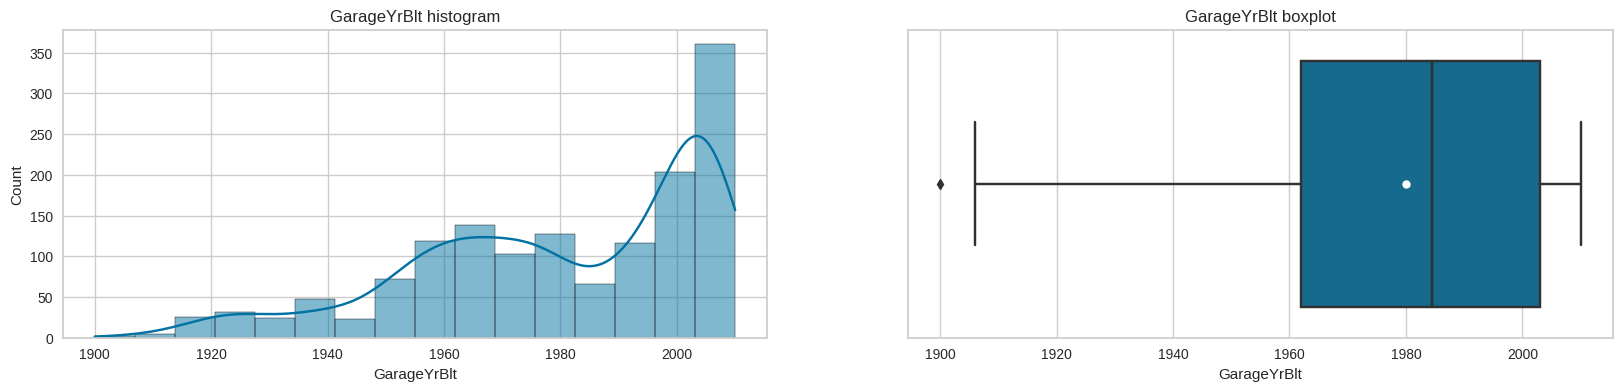

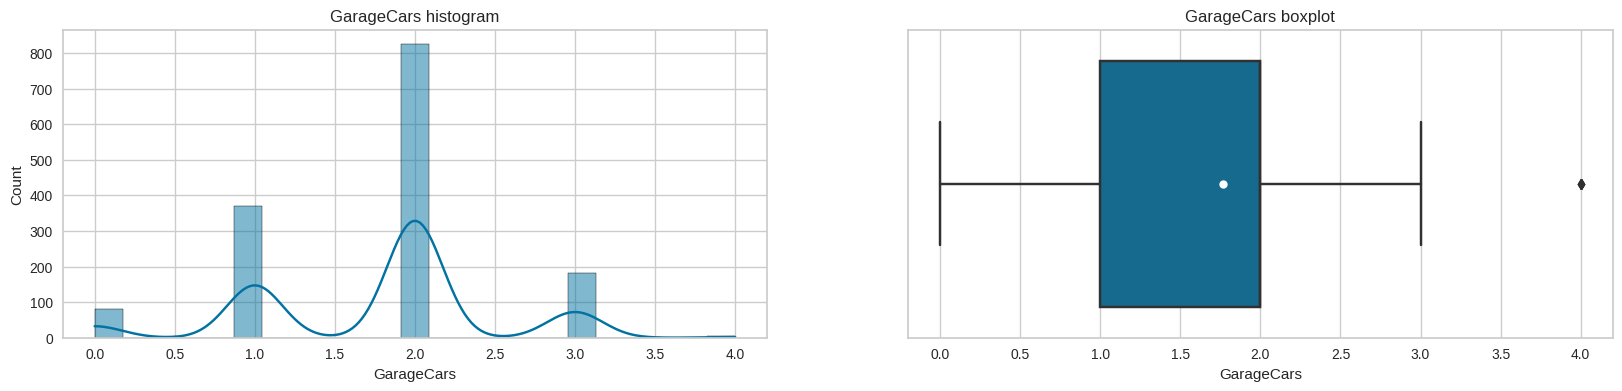

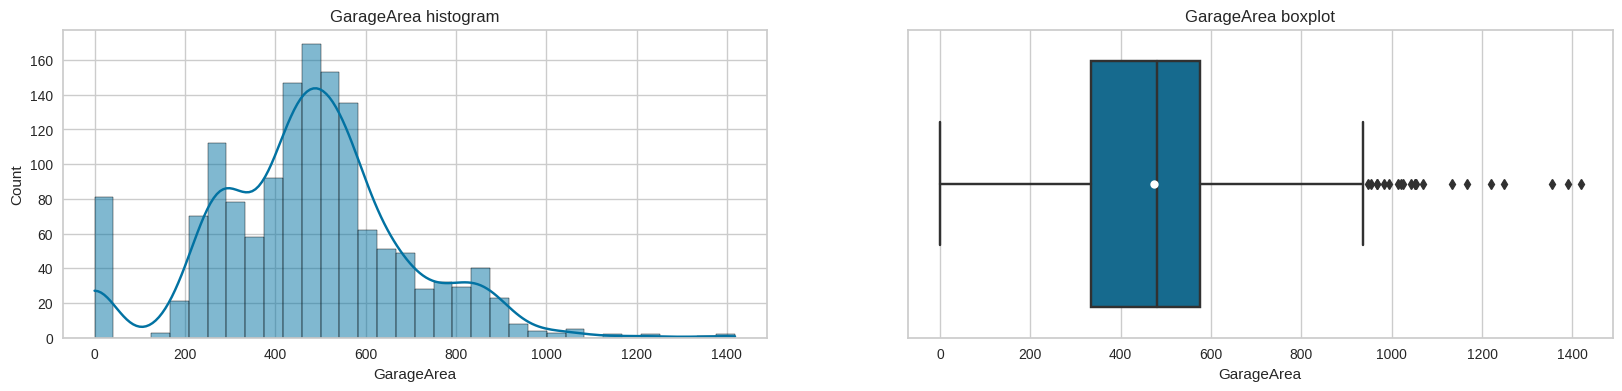

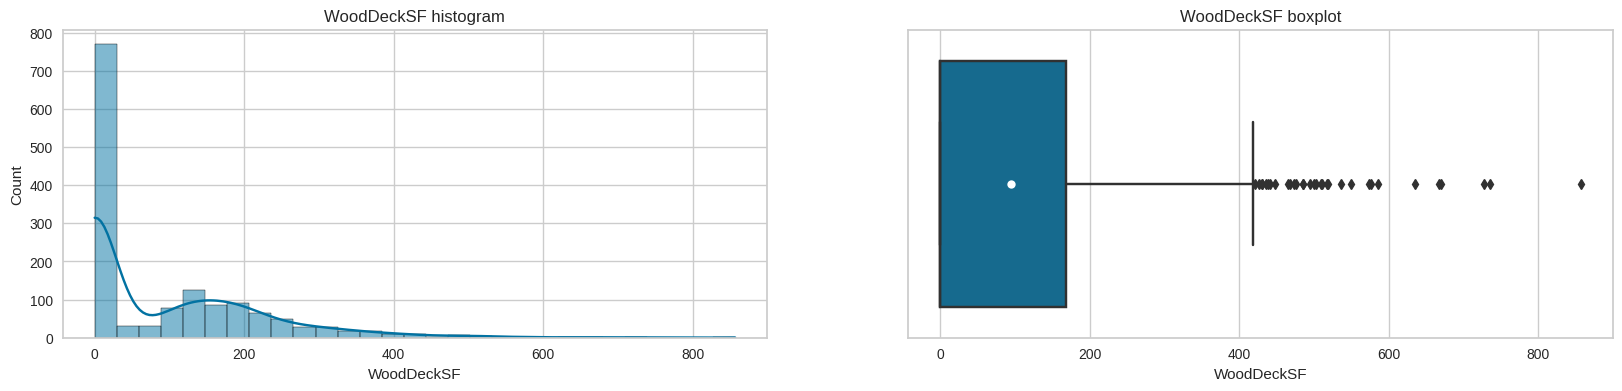

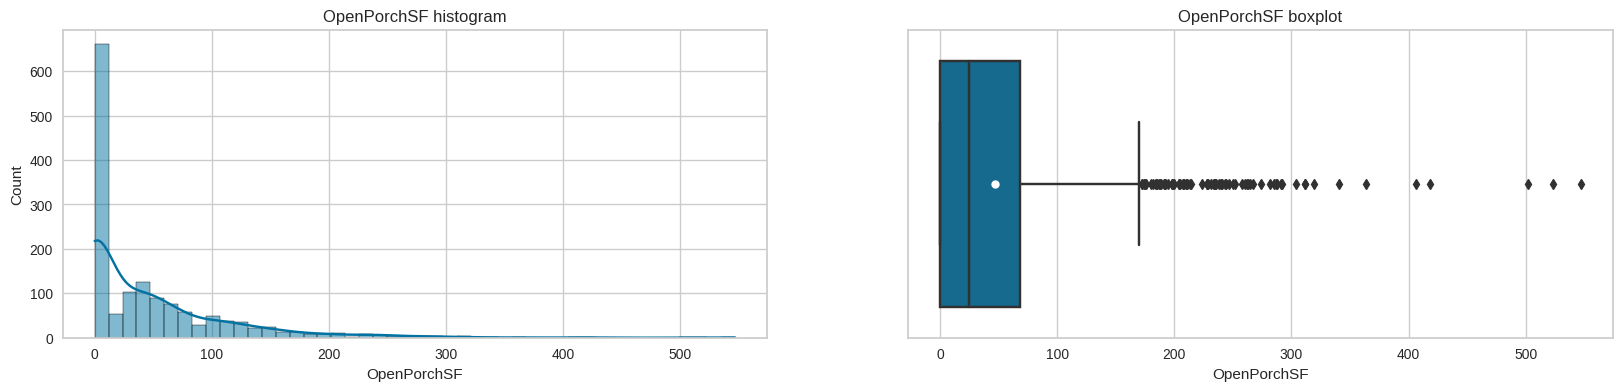

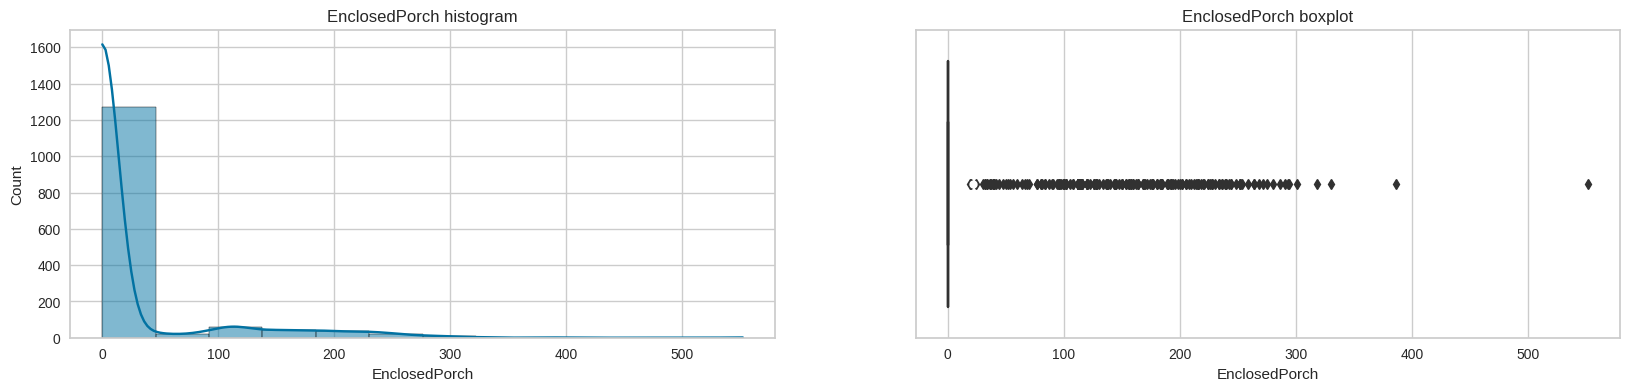

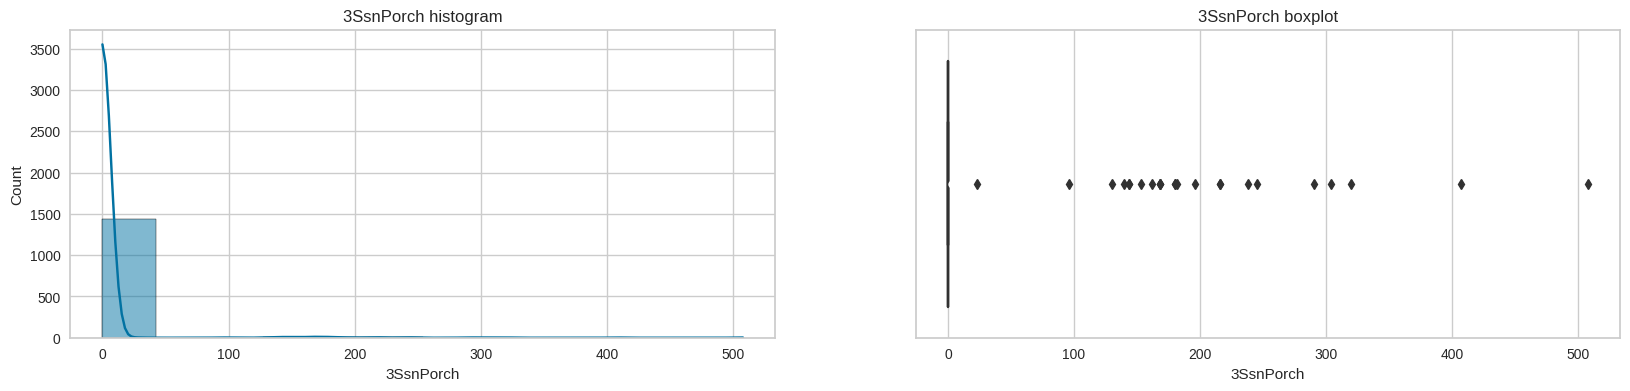

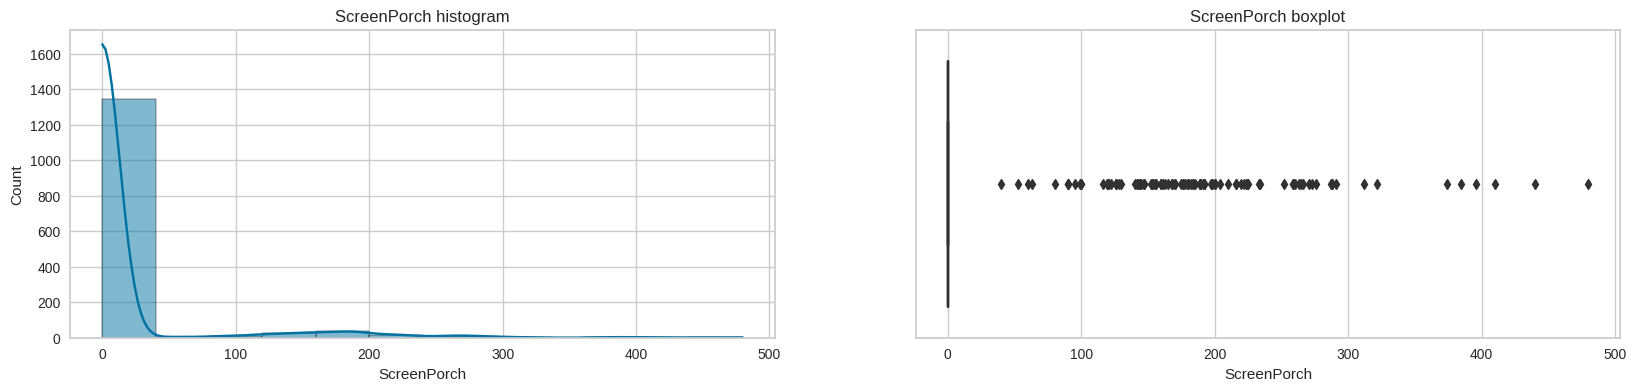

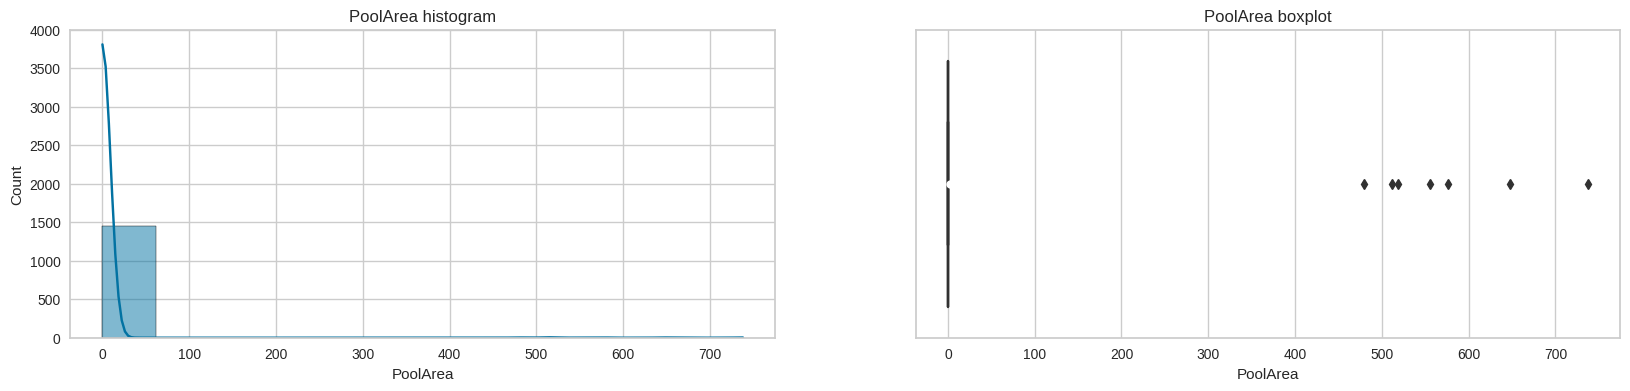

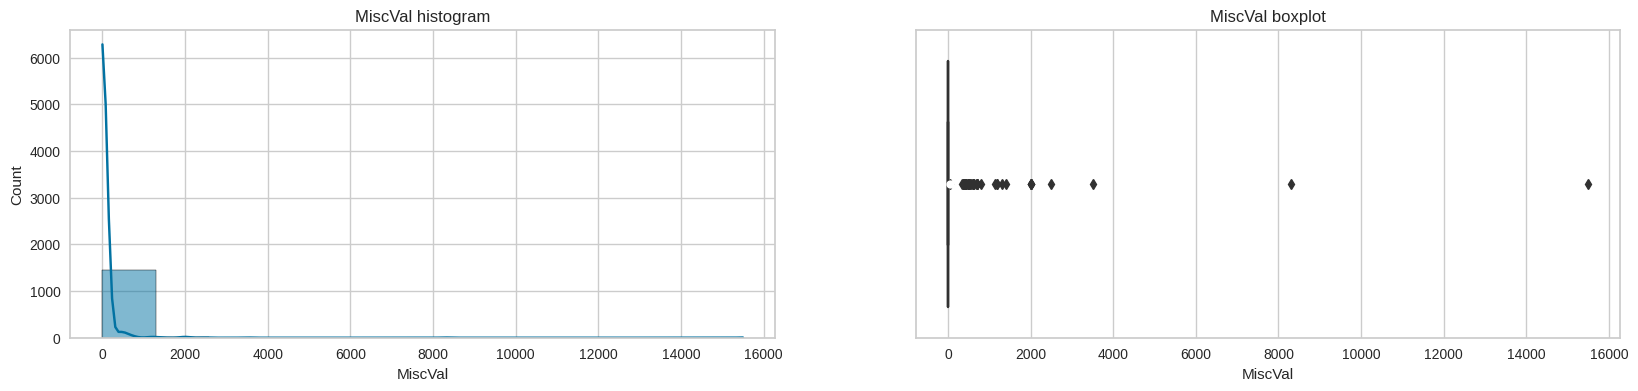

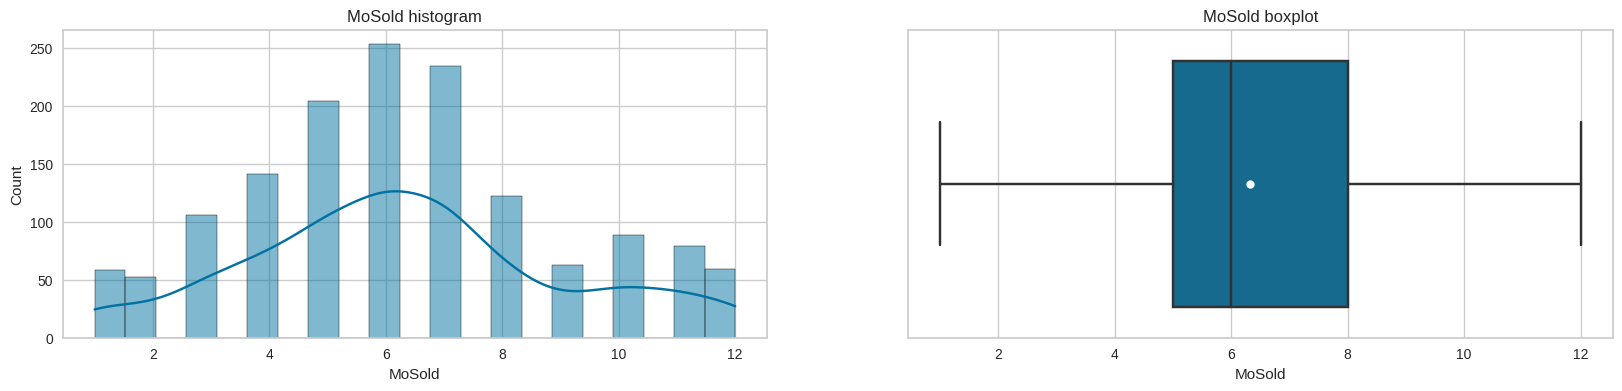

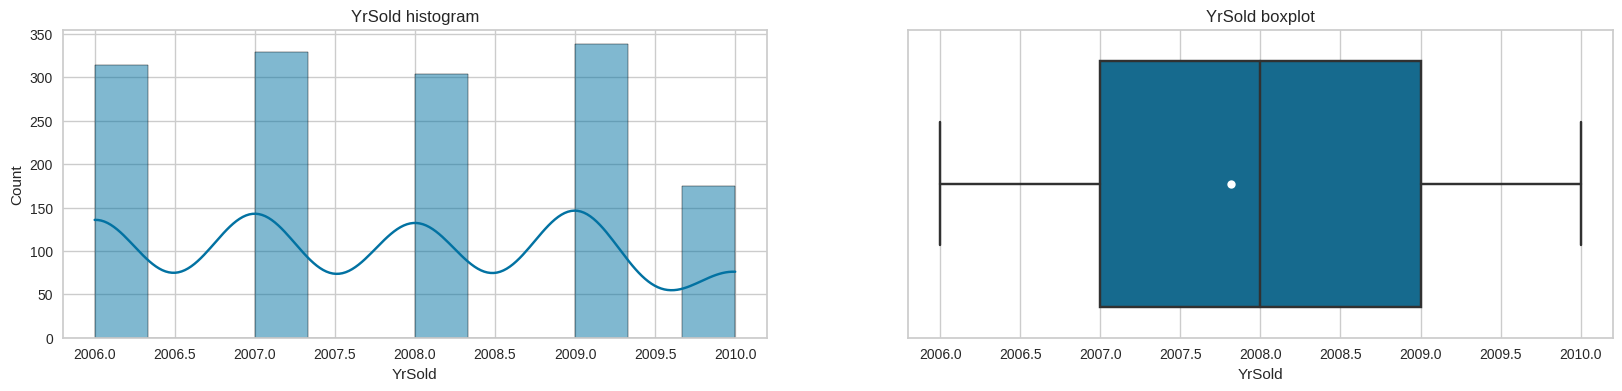

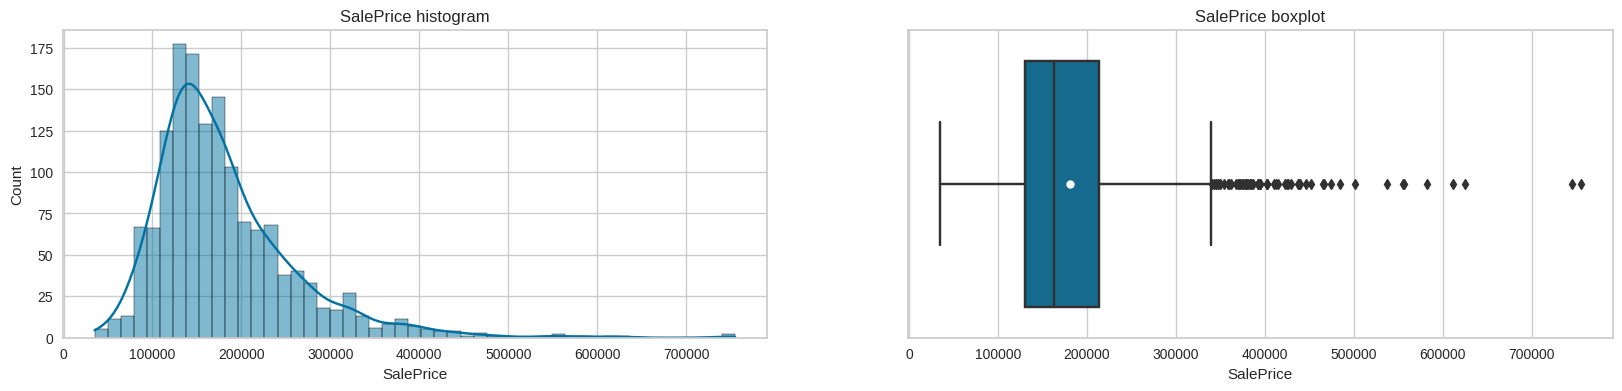

In [ ]:
mean_type = {"marker":"o","markerfacecolor":"white","markeredgecolor":"black"}
for item in num_col_addTarget :
    fig, ax = plt.subplots(1, 2, figsize=(20,4))
    sns.histplot(data=HousePrices_train,x=item, ax=ax[0], kde=True)
    ax[0].set_title(item+" histogram")
    sns.boxplot(data=HousePrices_train,x=item,ax=ax[1],showmeans = True,meanprops=mean_type)
    ax[1].set_title(item+" boxplot")
    plt.show()

<Axes: >

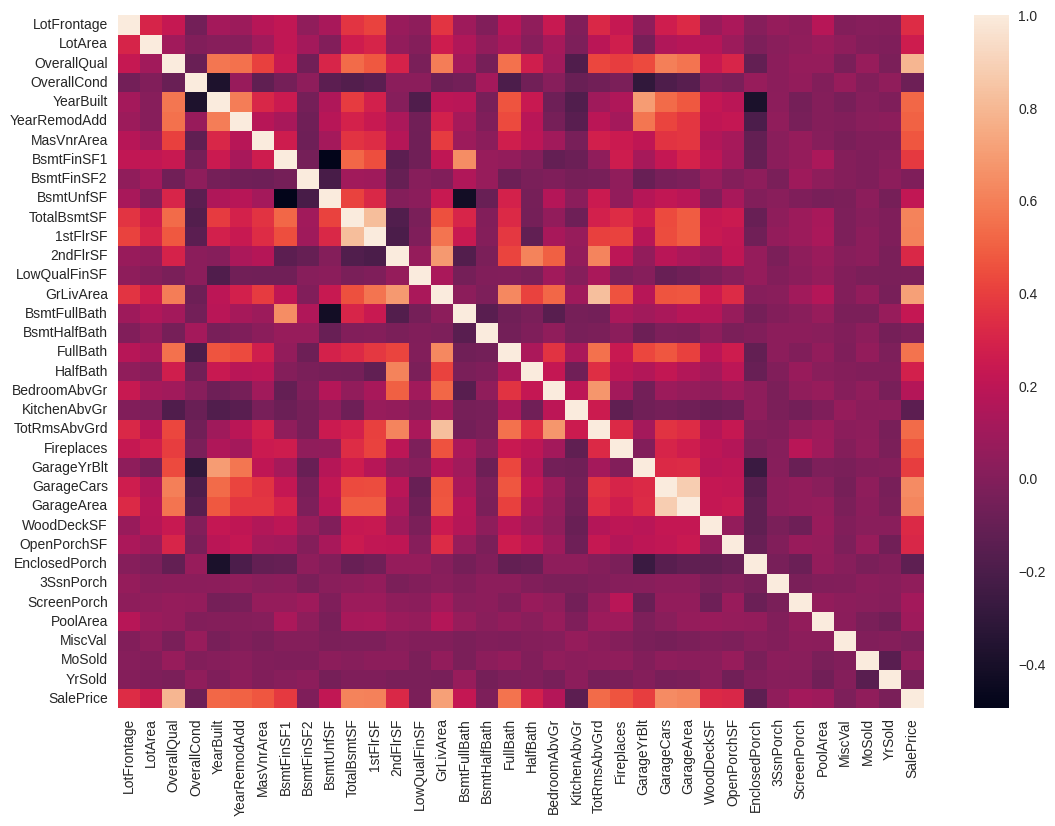

In [ ]:
cmat = HousePrices_train[num_col_addTarget].corr()
plt.subplots(figsize=(13, 9))
sns.heatmap(cmat, annot=False)

# **Predict**

## **Create Model**

In [ ]:
from pycaret.regression import *

In [ ]:
bin_col = ['OverallQual','OverallCond']
date_col = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
#ลบออกจากตัวหลักด้วย

In [ ]:
# Remove members of B from A using a list comprehension
num_col = [x for x in num_col if x not in bin_col]
num_col = [x for x in num_col if x not in date_col]

In [ ]:
print(HousePrices_train[num_col].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

In [ ]:
setup_df = setup(data = HousePrices_train ,target = 'SalePrice',
                 numeric_features = num_col, numeric_imputation='median',
                 categorical_features = cat_col,categorical_imputation='mode',
                 ignore_features = ['Id'],train_size = 0.8, normalize = True,
                 normalize_method='robust', transformation=True, transform_target=True,
                 bin_numeric_features=bin_col, date_features=date_col,
                 ordinal_features = ordinal_col_info, session_id = 69)

TypeError: ignored

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,17018.5054,824017855.7056,28070.1245,0.8665,0.1413,0.1010,2.3270
lightgbm,Light Gradient Boosting Machine,17048.9000,873939353.6325,28491.0639,0.8594,0.1354,0.0977,1.1550
gbr,Gradient Boosting Regressor,16810.5828,850221642.9536,27738.5228,0.8552,0.1324,0.0976,1.4730
xgboost,Extreme Gradient Boosting,18579.7621,901616225.0173,29179.6015,0.8532,0.1409,0.1056,1.8280
rf,Random Forest Regressor,17943.3194,958103693.3539,29786.9282,0.8398,0.1454,0.1057,2.2720
ada,AdaBoost Regressor,23819.1541,1221610712.9643,34398.3763,0.7989,0.1926,0.1548,1.2370
ridge,Ridge Regression,21302.5377,1665121329.8052,37282.9996,0.7148,0.1881,0.1272,1.0180
dt,Decision Tree Regressor,26348.0642,1788918299.9189,41446.6535,0.7055,0.2088,0.1543,0.7240
en,Elastic Net,20665.1951,1751440290.5371,38227.5709,0.7015,0.1738,0.1209,1.1590
omp,Orthogonal Matching Pursuit,23456.5419,1906860204.8392,40592.0102,0.6791,0.2169,0.1412,0.7380


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

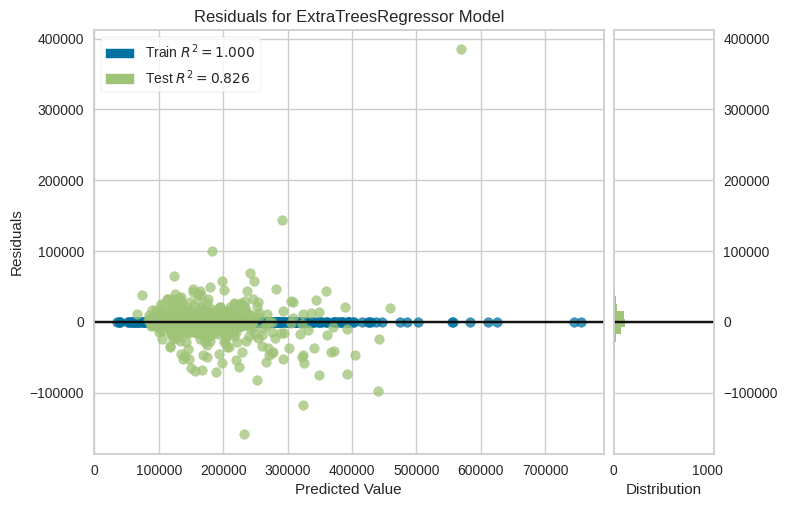

In [ ]:
plot_model(best, plot = 'residuals')

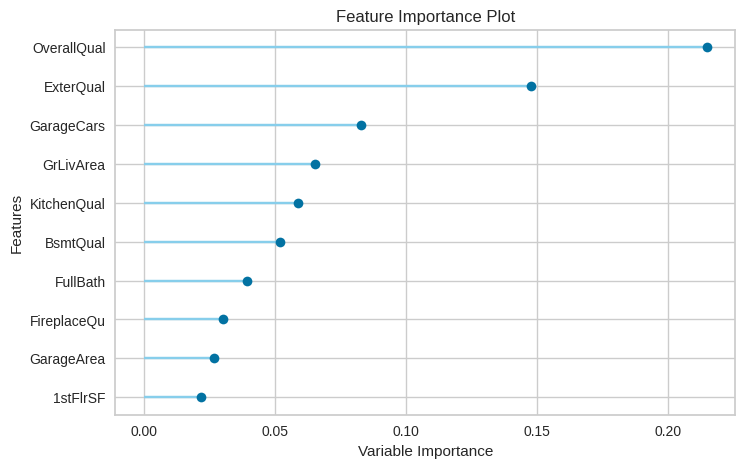

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=69)


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
et_reg = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17010.7573,697617824.0014,26412.4558,0.8646,0.1505,0.1052
1,18752.2638,895440882.7988,29923.9182,0.9022,0.1668,0.1144
2,17221.4546,730098919.4607,27020.3427,0.8883,0.1211,0.0949
3,18016.3866,1757200473.4042,41918.9751,0.6320,0.1789,0.1163
4,13666.6041,333827448.9021,18270.9455,0.9154,0.1239,0.0935
5,16504.7671,808582040.9260,28435.5770,0.9084,0.1327,0.0929
6,16124.1338,639495725.8651,25288.2527,0.8858,0.1316,0.0969
7,18622.0402,797331756.1667,28237.0635,0.9008,0.1575,0.1131
8,18471.1276,1086004496.8648,32954.5823,0.8541,0.1152,0.0833


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

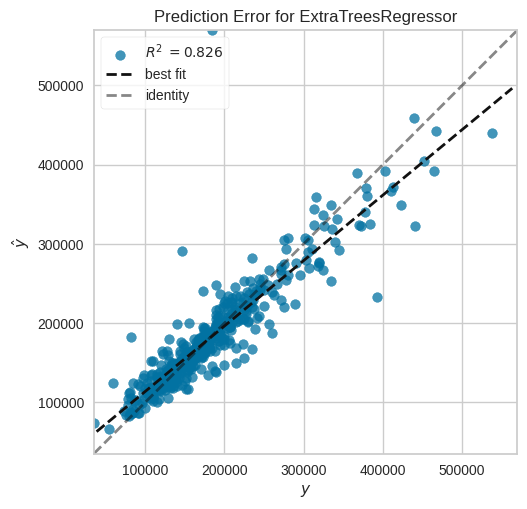

In [ ]:
plot_model(et_reg, plot = 'error')

### **Test Prediction**

In [ ]:
test_pred = predict_model(et_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,17666.4399,994931091.7723,31542.5283,0.8259,0.1503,0.1030


In [ ]:
test_pred.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
916,20,C (all),50.0,9000,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,10,2006,WD,Abnorml,35311,73907.98
875,60,FV,75.0,9000,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,8,2007,New,Partial,303477,280240.47
268,30,RM,71.0,6900,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,120500,123309.48
886,90,RL,70.0,8393,Pave,None,Reg,Lvl,AllPub,Corner,...,None,None,None,0,6,2006,WD,Family,145000,148969.00
777,20,RL,100.0,13350,Pave,None,IR1,Lvl,AllPub,Inside,...,None,MnPrv,None,0,6,2006,WD,Normal,142500,147853.50


In [ ]:
test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 916 to 723
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MSSubClass        439 non-null    category
 1   MSZoning          439 non-null    category
 2   LotFrontage       439 non-null    float32 
 3   LotArea           439 non-null    int32   
 4   Street            439 non-null    category
 5   Alley             439 non-null    category
 6   LotShape          439 non-null    category
 7   LandContour       439 non-null    category
 8   Utilities         439 non-null    category
 9   LotConfig         439 non-null    category
 10  LandSlope         439 non-null    category
 11  Neighborhood      439 non-null    category
 12  Condition1        439 non-null    category
 13  Condition2        439 non-null    category
 14  BldgType          439 non-null    category
 15  HouseStyle        439 non-null    category
 16  OverallQual       439 no

In [ ]:
y_test = test_pred['SalePrice']
y_predict = test_pred['prediction_label']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = r2_score(y_test, y_predict)
rmsle = mean_squared_log_error(y_test, y_predict)
mape = np.mean(np.abs((y_test - y_predict) / y_test)) * 100

# Create a pandas dataframe to store the metrics
metrics = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'],
                        'Value': [mae, mse, rmse, r2, rmsle, mape]})

# Print the dataframe
display(metrics)

,Metric,Value
0,MAE,1.766644e+04
1,MSE,9.949311e+08
2,RMSE,3.154253e+04
3,R2,8.258931e-01
4,RMSLE,2.258732e-02
5,MAPE,1.029557e+01


R2 = 0.83 ยังต้องปรับปรุงวิธีเลือกอีก

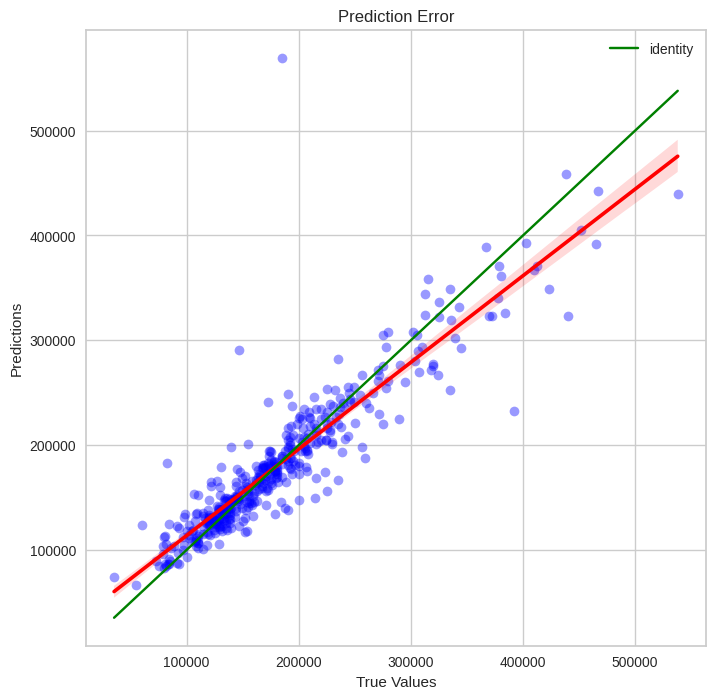

In [ ]:
# calculate prediction error
error = y_test - y_predict

# plot prediction error
plt.figure(figsize=(8, 8))
sns.regplot(x=y_test, y=y_predict, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.4, 'color': 'blue'})
sns.lineplot(x=y_test, y=y_test, color='green', label='identity')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction Error')

plt.legend()
plt.show()

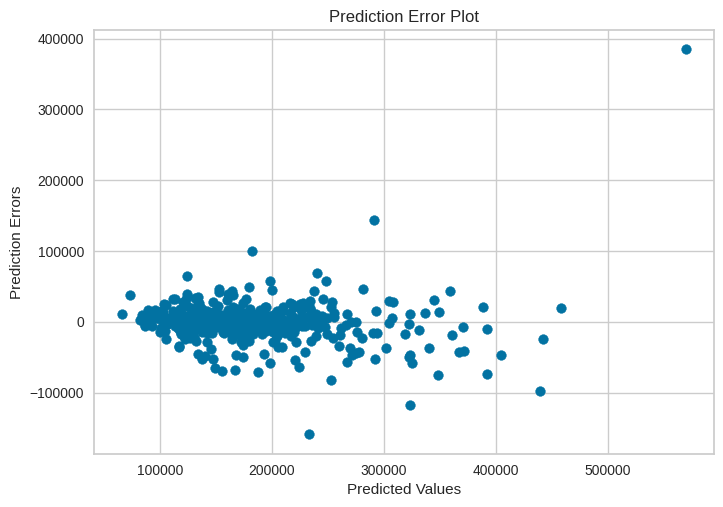

In [ ]:
# calculate prediction errors
errors = y_predict - y_test

# plot prediction errors
plt.scatter(y_predict, errors)
plt.xlabel('Predicted Values')
plt.ylabel('Prediction Errors')
plt.title('Prediction Error Plot')
plt.show()

Note : กลับไปปรับปรุงโมเดลอีกนิดแล้วค่อยเอามาลองกับ Unseen data

## **Prediction Unseen Data**

In [ ]:
HousePrices_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   object 
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
missing_values_sum = HousePrices_unseen.isnull().sum()
missing_values_sum[missing_values_sum > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
#from train
print('fill_null_with_none :' , fill_null_with_none)
print('imputation_with_mode :' , imputation_with_mode , ', mode =' , [HousePrices_train[item].mode()[0] for item in imputation_with_mode])
print('imputation_with_med :' , imputation_with_med,', median =', HousePrices_train['LotFrontage'].median())

fill_null_with_none : ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
imputation_with_mode : ['MasVnrArea', 'Electrical', 'GarageFinish'] , mode = [0.0, 'SBrkr', 'Unf']
imputation_with_med : ['LotFrontage'] , median = 69.0
